In [1]:
import torch
from torch import nn
from torch.nn import functional as F
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cvxpy as cp
from systems_and_functions.control_affine_system import ControlAffineSystem
from systems_and_functions.cart_pole_system import CartPole
from systems_and_functions.inverted_pendulum_system import InvertedPendulum
from systems_and_functions.networks import PolicyNet, LyapunovNet, DFunctionNet
from systems_and_functions.off_policy_dlearning_process import OffPolicyDlearningProcess
%matplotlib notebook 
%matplotlib inline   

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

np.random.seed(15)

torch.manual_seed(24)
if torch.cuda.is_available():
    torch.cuda.manual_seed(24)
    torch.cuda.manual_seed_all(24)

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

Controller is involved.
-----------------Convergence Speed and Judgment-----------------
--------------It takes 98 steps to norm 2 ball;--------------
---------------It takes 125 steps to unit ball;---------------
----------------It takes 169 steps to converge.--------------
-------------------------------Main Iteration------------------------------
---------------------Initializing Policy------------------------


d:\ICRA\DOPT\systems_and_functions\inverted_pendulum_system.py:227: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


Epoch [1000/1000], Loss: 0.0922812894
-------------------------Direct Update--------------------------
-----------------Convergence Speed and Judgment-----------------
--------------It takes 99 steps to norm 2 ball;--------------
---------------It takes 127 steps to unit ball;---------------
----------------It takes 174 steps to converge.--------------


d:\ICRA\DOPT\systems_and_functions\inverted_pendulum_system.py:227: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


---------------------------------Iteration 1-------------------------------
---------------------Sampling Training Data---------------------
--------------------------Learning V----------------------------
Epoch [1000/1000], Loss: 4.4840421677
L0:tensor([0.0022], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.0, 
torch.sum(F.relu(dL)):0.00867694616317749
-------------------------Direct Update--------------------------
--------------------------Learning D----------------------------
Epoch [1000/1000], Loss: 0.5713635087
torch.sum(loss_fn(dL, DV_ext)):0.12483654171228409, 
torch.sum(F.relu(DV)):0.0, 
D0:tensor([-0.0278], device='cuda:0', grad_fn=<SelectBackward0>)
------------------------Improveing Policy-----------------------
--------------------------Soft Update---------------------------
---------------------Sampling Training Data---------------------
------------------------Improveing Policy-----------------------
--------------------------Soft Update---------------------------


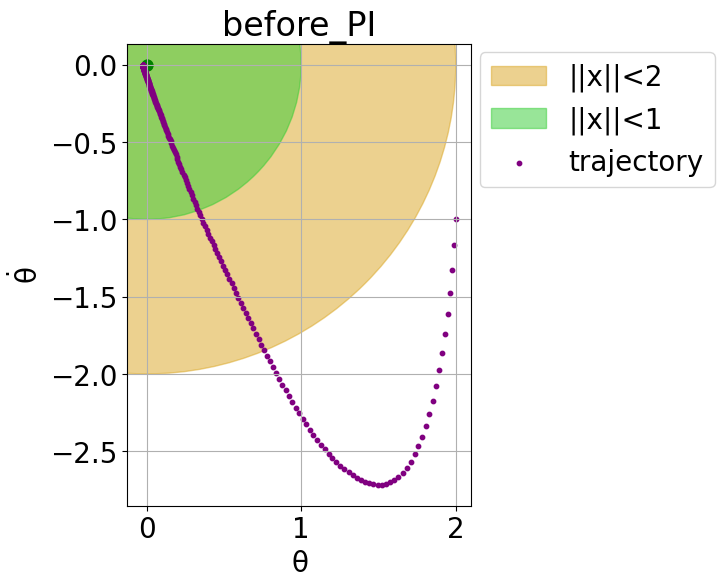

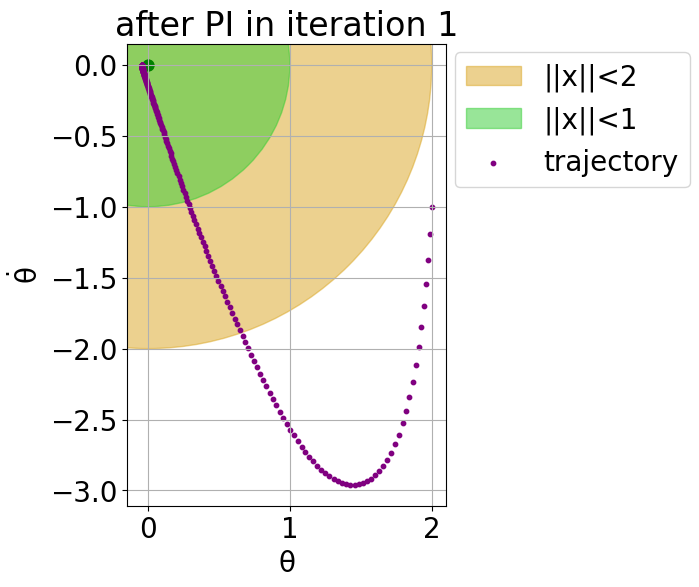

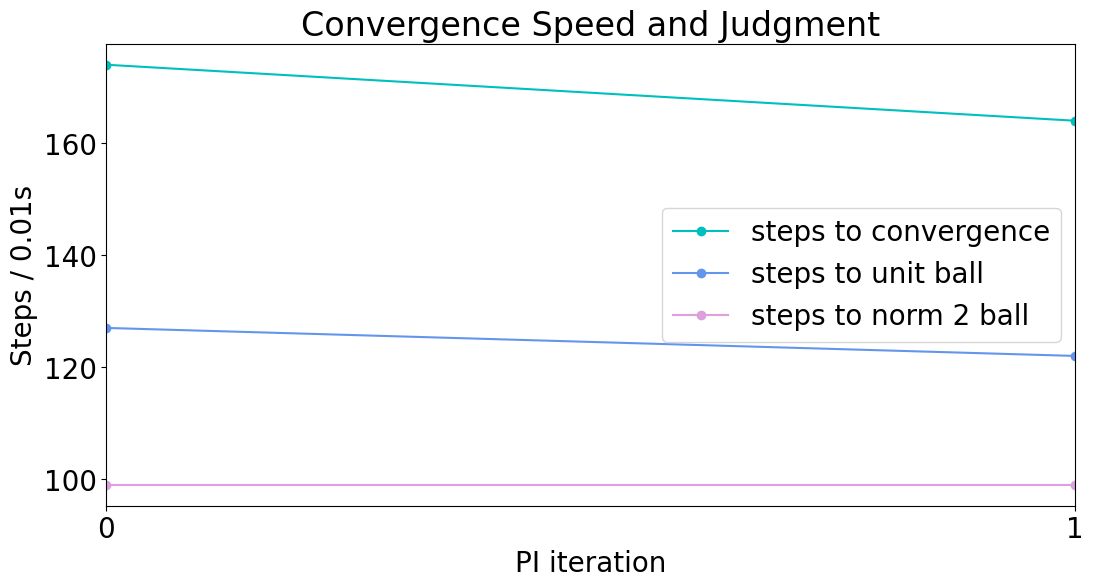

[174, 164]
[127, 122]
[99, 99]
---------------------------------Iteration 2-------------------------------
---------------------Sampling Training Data---------------------
--------------------------Learning V----------------------------
Epoch [1000/1000], Loss: 2.9393413067
L0:tensor([0.0004], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.0, 
torch.sum(F.relu(dL)):0.0
--------------------------Soft Update---------------------------
--------------------------Learning D----------------------------
Epoch [1000/1000], Loss: 1.1694953442
torch.sum(loss_fn(dL, DV_ext)):0.6890571713447571, 
torch.sum(F.relu(DV)):0.0, 
D0:tensor([-0.1434], device='cuda:0', grad_fn=<SelectBackward0>)
------------------------Improveing Policy-----------------------
--------------------------Soft Update---------------------------
---------------------Sampling Training Data---------------------
------------------------Improveing Policy-----------------------
--------------------------Soft Update--------------

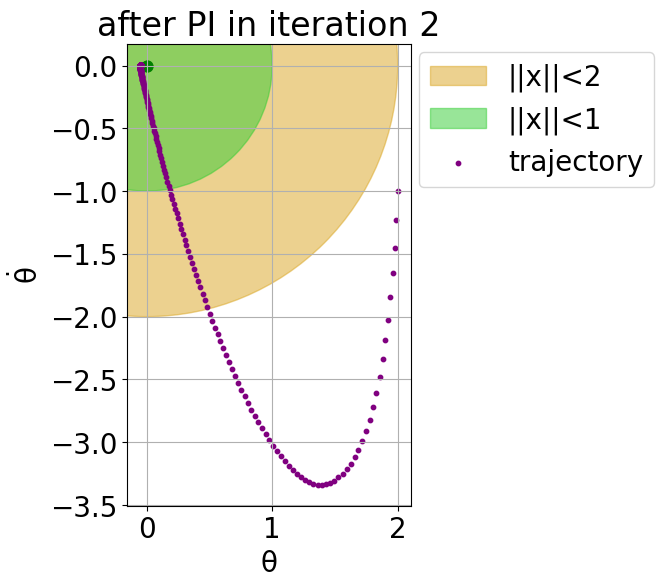

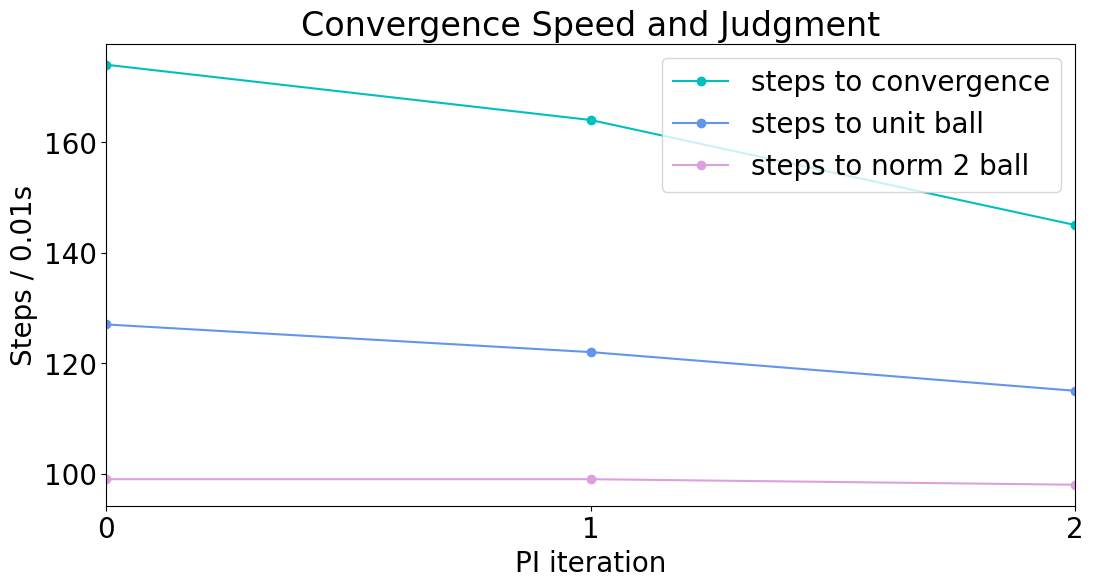

[174, 164, 145]
[127, 122, 115]
[99, 99, 98]
---------------------------------Iteration 3-------------------------------
---------------------Sampling Training Data---------------------
--------------------------Learning V----------------------------
Epoch [1000/1000], Loss: 1.4207109213
L0:tensor([0.0570], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.0, 
torch.sum(F.relu(dL)):0.0
--------------------------Soft Update---------------------------
--------------------------Learning D----------------------------
Epoch [1000/1000], Loss: 3.1962335110
torch.sum(loss_fn(dL, DV_ext)):2.6742818355560303, 
torch.sum(F.relu(DV)):0.0, 
D0:tensor([-0.2421], device='cuda:0', grad_fn=<SelectBackward0>)
------------------------Improveing Policy-----------------------
--------------------------Soft Update---------------------------
---------------------Sampling Training Data---------------------
------------------------Improveing Policy-----------------------
--------------------------Soft Update

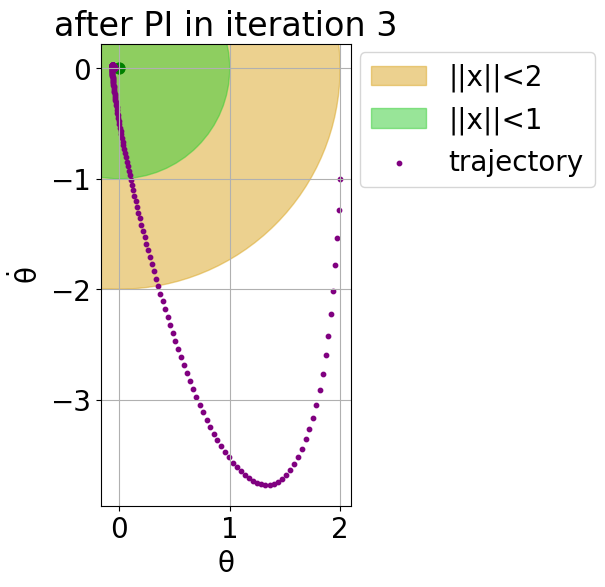

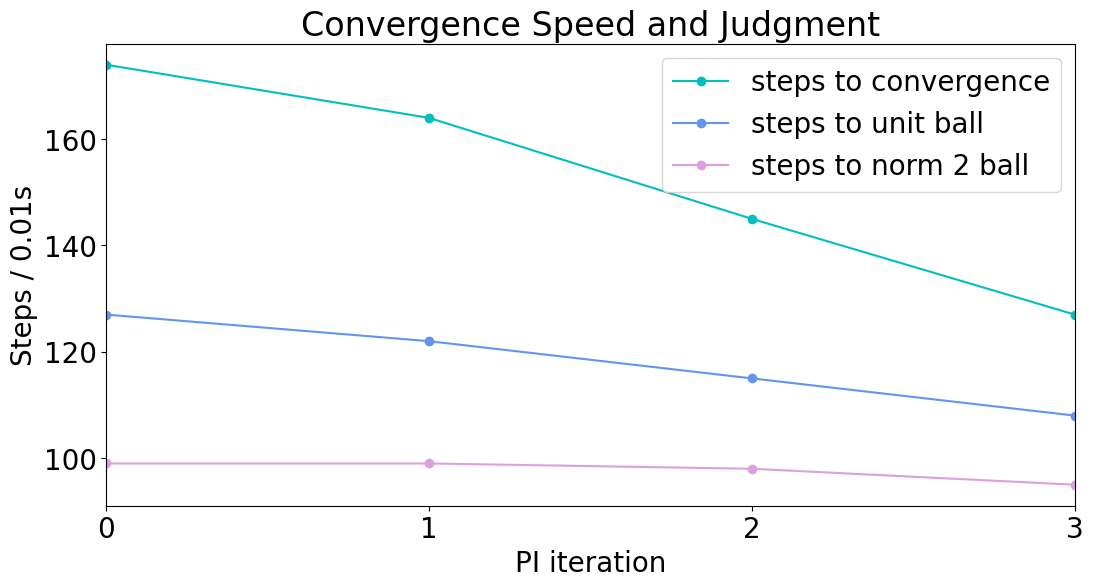

[174, 164, 145, 127]
[127, 122, 115, 108]
[99, 99, 98, 95]
---------------------------------Iteration 4-------------------------------
---------------------Sampling Training Data---------------------
--------------------------Learning V----------------------------
Epoch [1000/1000], Loss: 1.1273425817
L0:tensor([0.0999], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.0, 
torch.sum(F.relu(dL)):0.0
--------------------------Soft Update---------------------------
--------------------------Learning D----------------------------
Epoch [1000/1000], Loss: 4.1600904465
torch.sum(loss_fn(dL, DV_ext)):3.591831922531128, 
torch.sum(F.relu(DV)):0.0, 
D0:tensor([-0.3239], device='cuda:0', grad_fn=<SelectBackward0>)
------------------------Improveing Policy-----------------------
--------------------------Soft Update---------------------------
---------------------Sampling Training Data---------------------
------------------------Improveing Policy-----------------------
------------------------

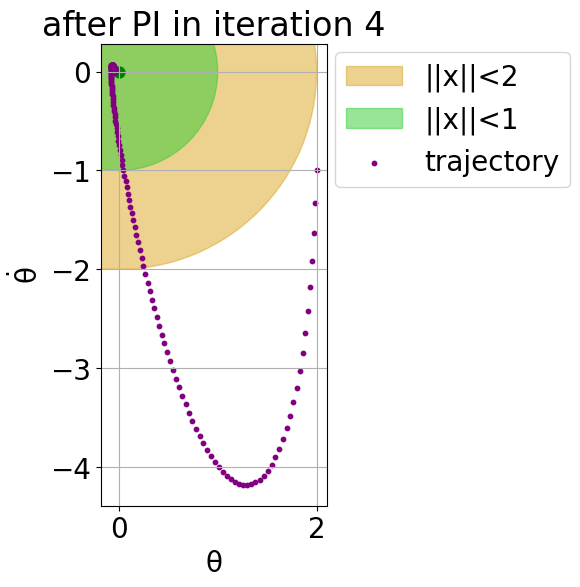

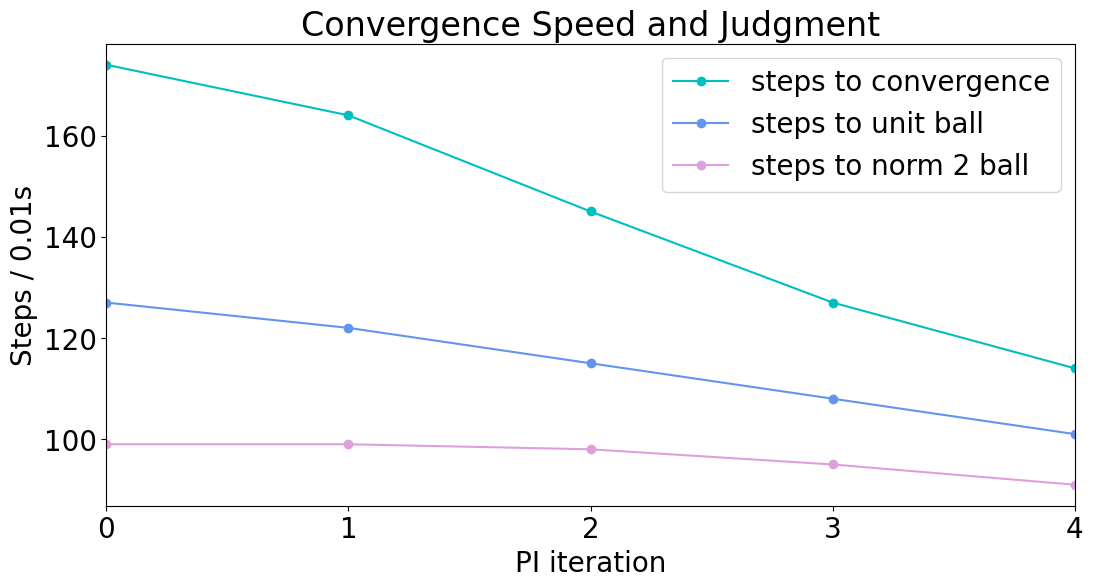

[174, 164, 145, 127, 114]
[127, 122, 115, 108, 101]
[99, 99, 98, 95, 91]
---------------------------------Iteration 5-------------------------------
---------------------Sampling Training Data---------------------
--------------------------Learning V----------------------------
Epoch [1000/1000], Loss: 0.9308735132
L0:tensor([0.0088], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.0, 
torch.sum(F.relu(dL)):0.0
--------------------------Soft Update---------------------------
--------------------------Learning D----------------------------
Epoch [1000/1000], Loss: 7.8070702553
torch.sum(loss_fn(dL, DV_ext)):7.2152934074401855, 
torch.sum(F.relu(DV)):0.0, 
D0:tensor([-0.3575], device='cuda:0', grad_fn=<SelectBackward0>)
------------------------Improveing Policy-----------------------
--------------------------Soft Update---------------------------
---------------------Sampling Training Data---------------------
------------------------Improveing Policy-----------------------
---------

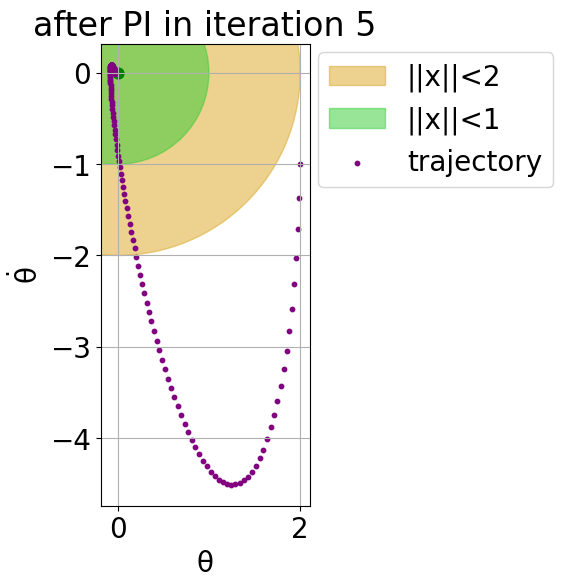

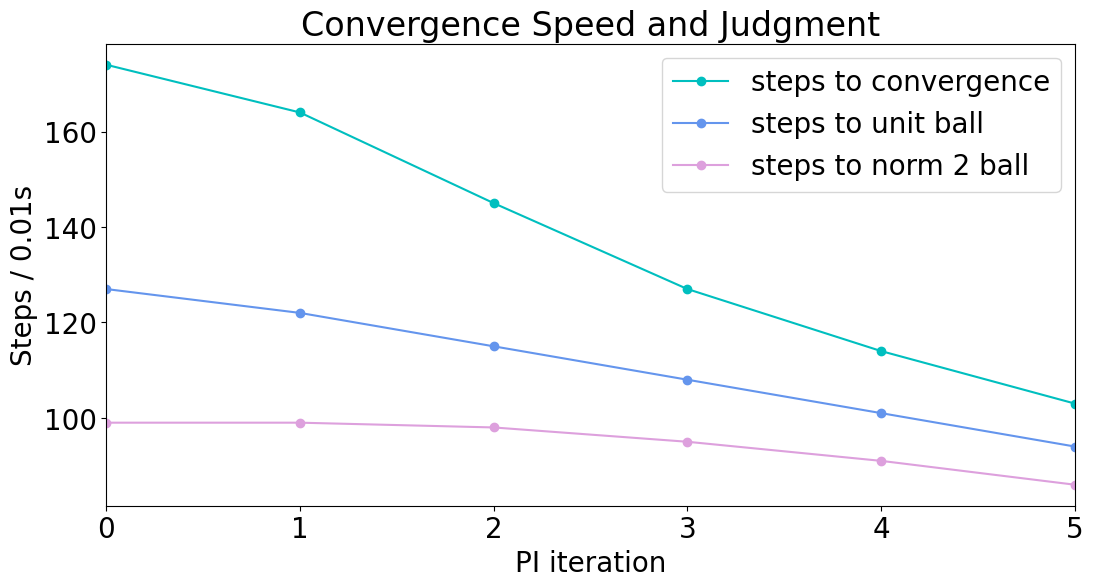

[174, 164, 145, 127, 114, 103]
[127, 122, 115, 108, 101, 94]
[99, 99, 98, 95, 91, 86]
---------------------------------Iteration 6-------------------------------
---------------------Sampling Training Data---------------------
--------------------------Learning V----------------------------
Epoch [1000/1000], Loss: 0.8589887619
L0:tensor([0.0122], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.0, 
torch.sum(F.relu(dL)):0.0
--------------------------Soft Update---------------------------
--------------------------Learning D----------------------------
Epoch [1000/1000], Loss: 5.6763486862
torch.sum(loss_fn(dL, DV_ext)):5.16193962097168, 
torch.sum(F.relu(DV)):0.0, 
D0:tensor([-0.2172], device='cuda:0', grad_fn=<SelectBackward0>)
------------------------Improveing Policy-----------------------
--------------------------Soft Update---------------------------
---------------------Sampling Training Data---------------------
------------------------Improveing Policy----------------------

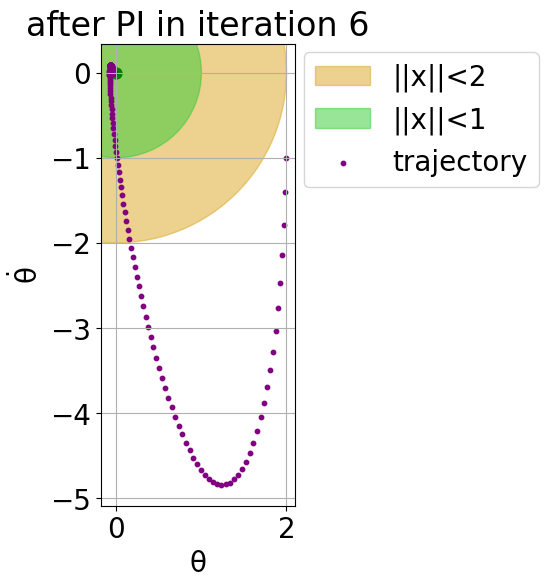

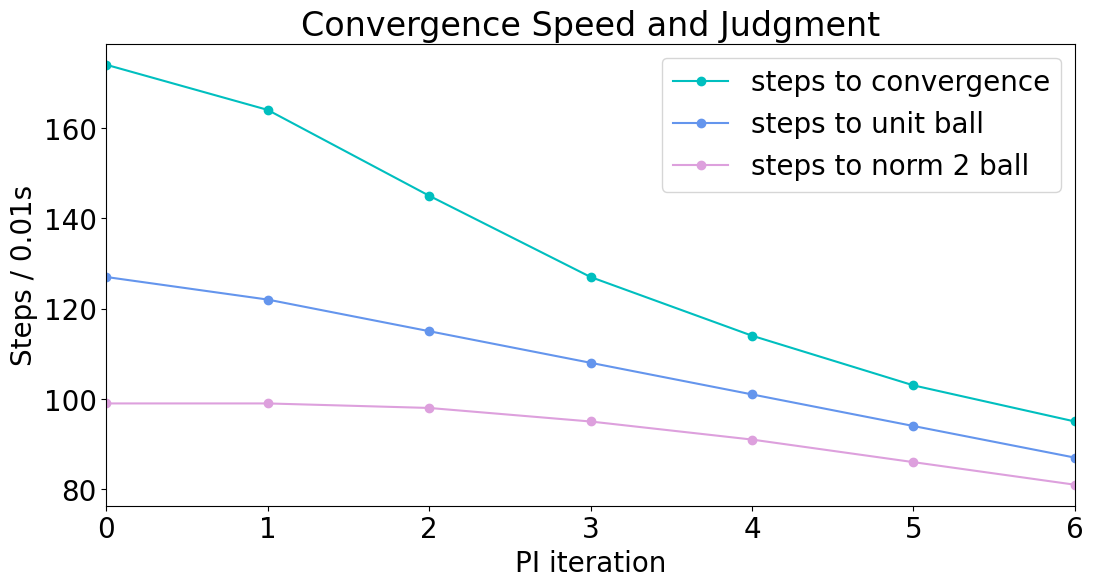

[174, 164, 145, 127, 114, 103, 95]
[127, 122, 115, 108, 101, 94, 87]
[99, 99, 98, 95, 91, 86, 81]
---------------------------------Iteration 7-------------------------------
---------------------Sampling Training Data---------------------
--------------------------Learning V----------------------------
Epoch [1000/1000], Loss: 0.8615427017
L0:tensor([0.0450], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.0, 
torch.sum(F.relu(dL)):0.0
--------------------------Soft Update---------------------------
--------------------------Learning D----------------------------
Epoch [1000/1000], Loss: 10.2638940811
torch.sum(loss_fn(dL, DV_ext)):9.658377647399902, 
torch.sum(F.relu(DV)):0.0, 
D0:tensor([-0.3735], device='cuda:0', grad_fn=<SelectBackward0>)
------------------------Improveing Policy-----------------------
--------------------------Soft Update---------------------------
---------------------Sampling Training Data---------------------
------------------------Improveing Policy--------

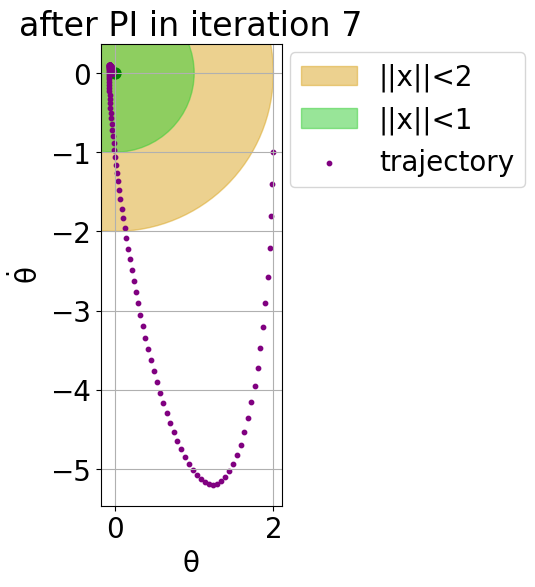

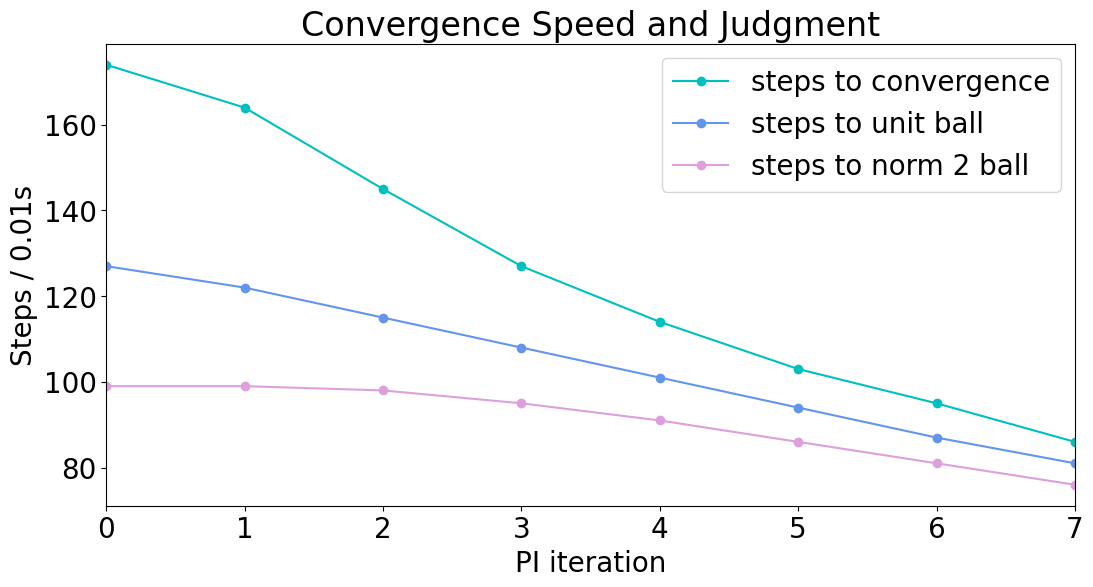

[174, 164, 145, 127, 114, 103, 95, 86]
[127, 122, 115, 108, 101, 94, 87, 81]
[99, 99, 98, 95, 91, 86, 81, 76]
---------------------------------Iteration 8-------------------------------
---------------------Sampling Training Data---------------------
--------------------------Learning V----------------------------
Epoch [1000/1000], Loss: 0.8748690486
L0:tensor([0.0467], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.0, 
torch.sum(F.relu(dL)):0.0
--------------------------Soft Update---------------------------
--------------------------Learning D----------------------------
Epoch [1000/1000], Loss: 11.0256452560
torch.sum(loss_fn(dL, DV_ext)):10.44227123260498, 
torch.sum(F.relu(DV)):0.0, 
D0:tensor([-0.3428], device='cuda:0', grad_fn=<SelectBackward0>)
------------------------Improveing Policy-----------------------
--------------------------Soft Update---------------------------
---------------------Sampling Training Data---------------------
------------------------Improveing Po

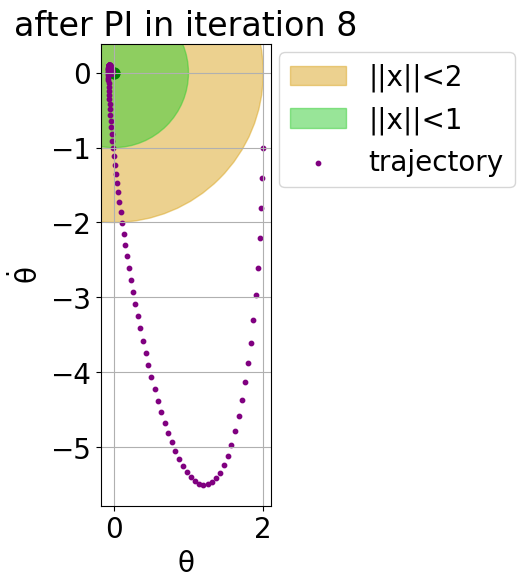

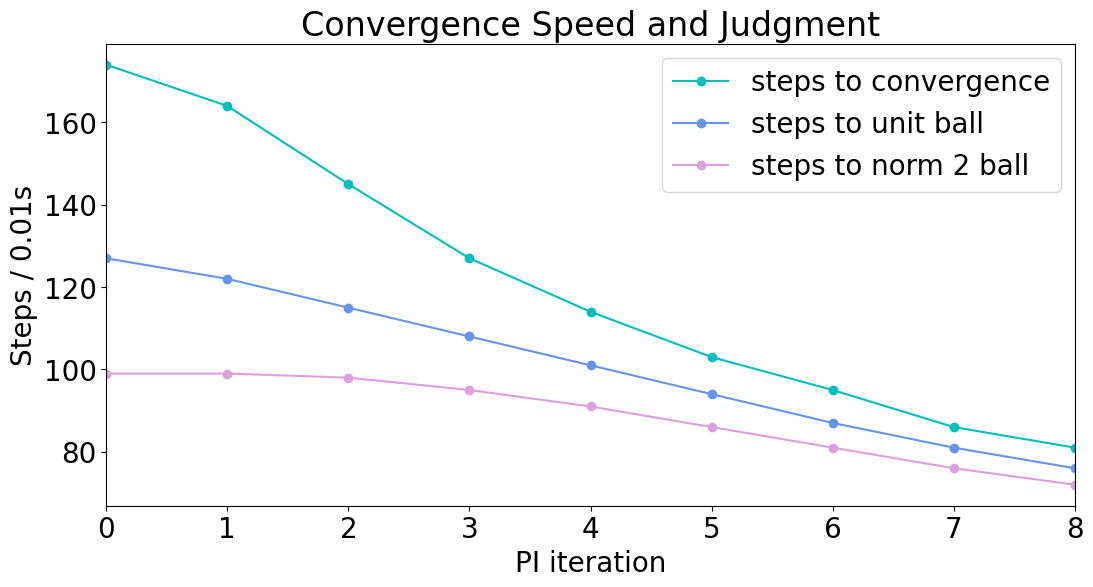

[174, 164, 145, 127, 114, 103, 95, 86, 81]
[127, 122, 115, 108, 101, 94, 87, 81, 76]
[99, 99, 98, 95, 91, 86, 81, 76, 72]
---------------------------------Iteration 9-------------------------------
---------------------Sampling Training Data---------------------
--------------------------Learning V----------------------------
Epoch [1000/1000], Loss: 0.8884328604
L0:tensor([0.0087], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.0, 
torch.sum(F.relu(dL)):0.0
--------------------------Soft Update---------------------------
--------------------------Learning D----------------------------
Epoch [1000/1000], Loss: 16.6796264648
torch.sum(loss_fn(dL, DV_ext)):16.054380416870117, 
torch.sum(F.relu(DV)):0.0, 
D0:tensor([-0.3974], device='cuda:0', grad_fn=<SelectBackward0>)
------------------------Improveing Policy-----------------------
--------------------------Soft Update---------------------------
---------------------Sampling Training Data---------------------
------------------------

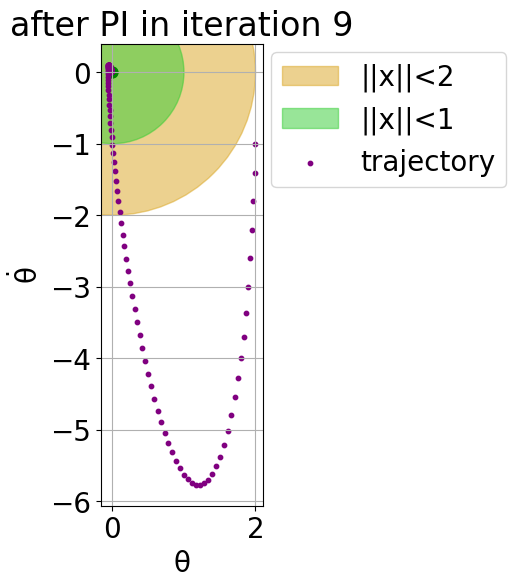

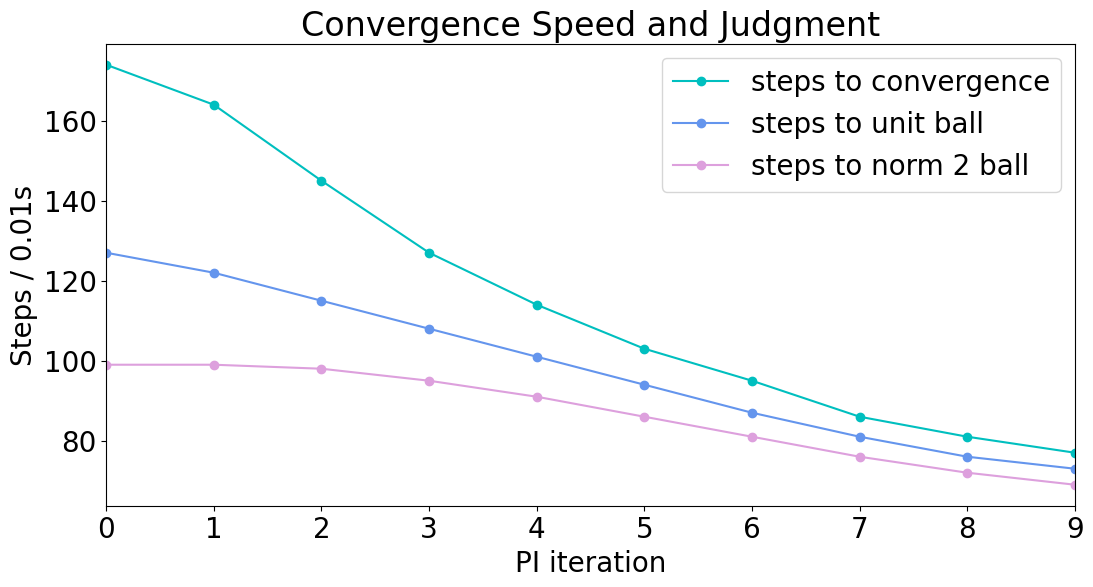

[174, 164, 145, 127, 114, 103, 95, 86, 81, 77]
[127, 122, 115, 108, 101, 94, 87, 81, 76, 73]
[99, 99, 98, 95, 91, 86, 81, 76, 72, 69]
---------------------------------Iteration 10-------------------------------
---------------------Sampling Training Data---------------------
--------------------------Learning V----------------------------
Epoch [1000/1000], Loss: 0.9082228541
L0:tensor([0.0041], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.0, 
torch.sum(F.relu(dL)):0.0
--------------------------Soft Update---------------------------
--------------------------Learning D----------------------------
Epoch [1000/1000], Loss: 13.1066102982
torch.sum(loss_fn(dL, DV_ext)):12.602502822875977, 
torch.sum(F.relu(DV)):0.0, 
D0:tensor([-0.1603], device='cuda:0', grad_fn=<SelectBackward0>)
------------------------Improveing Policy-----------------------
--------------------------Soft Update---------------------------
---------------------Sampling Training Data---------------------
-----------

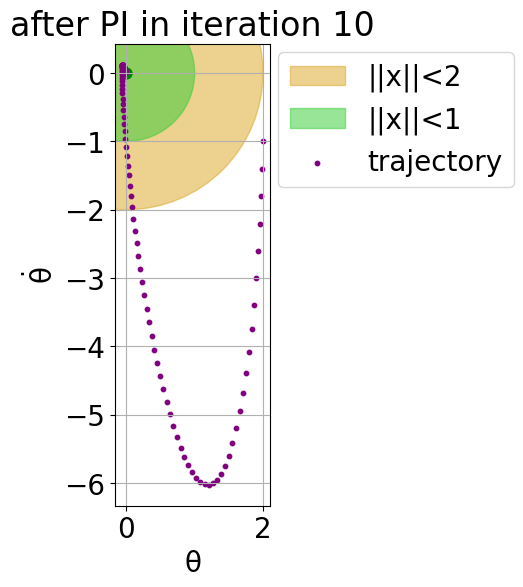

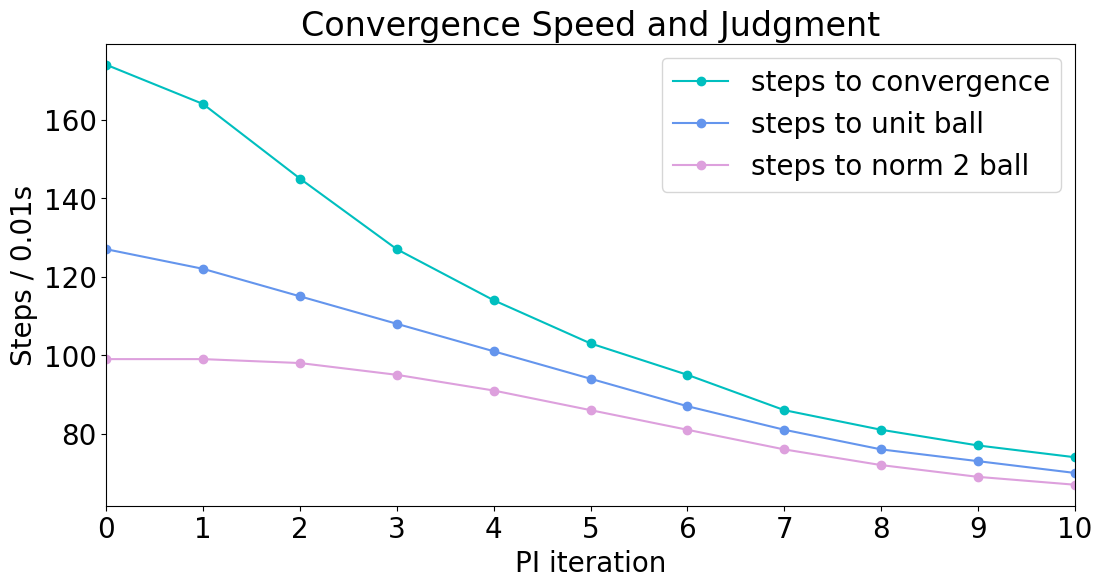

[174, 164, 145, 127, 114, 103, 95, 86, 81, 77, 74]
[127, 122, 115, 108, 101, 94, 87, 81, 76, 73, 70]
[99, 99, 98, 95, 91, 86, 81, 76, 72, 69, 67]
---------------------------------Iteration 11-------------------------------
---------------------Sampling Training Data---------------------
--------------------------Learning V----------------------------
Epoch [1000/1000], Loss: 0.9186678529
L0:tensor([0.0689], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.0, 
torch.sum(F.relu(dL)):0.0
--------------------------Soft Update---------------------------
--------------------------Learning D----------------------------
Epoch [1000/1000], Loss: 38.8387260437
torch.sum(loss_fn(dL, DV_ext)):38.28221893310547, 
torch.sum(F.relu(DV)):0.0, 
D0:tensor([-0.2799], device='cuda:0', grad_fn=<SelectBackward0>)
------------------------Improveing Policy-----------------------
--------------------------Soft Update---------------------------
---------------------Sampling Training Data---------------------


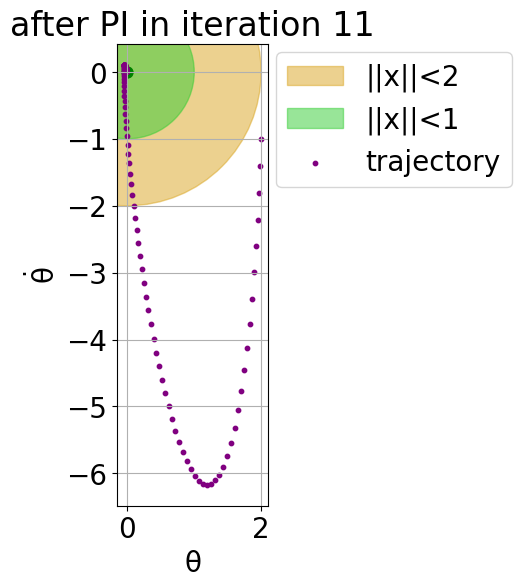

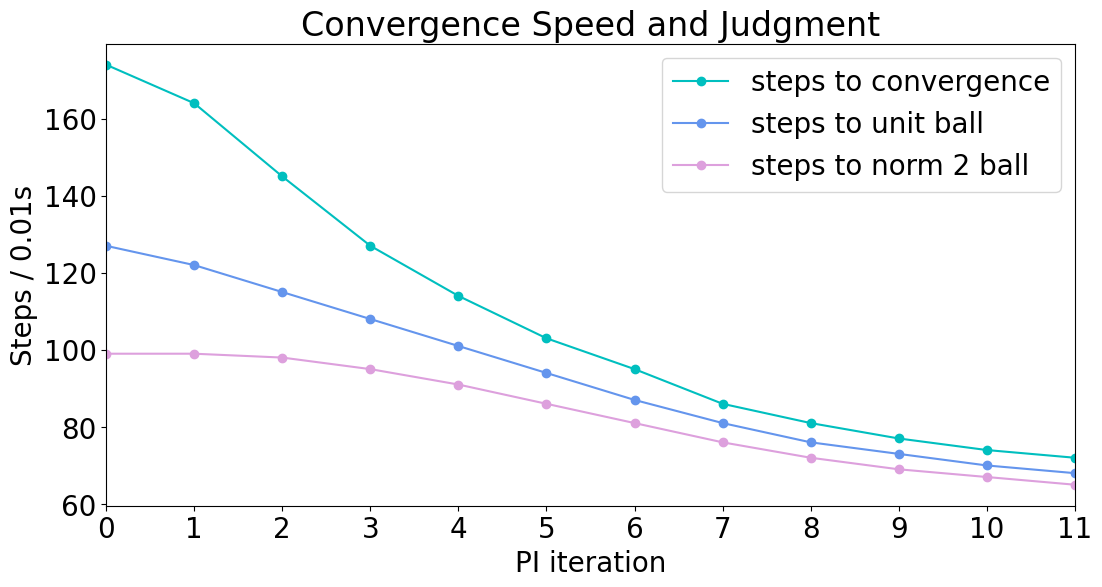

[174, 164, 145, 127, 114, 103, 95, 86, 81, 77, 74, 72]
[127, 122, 115, 108, 101, 94, 87, 81, 76, 73, 70, 68]
[99, 99, 98, 95, 91, 86, 81, 76, 72, 69, 67, 65]
---------------------------------Iteration 12-------------------------------
---------------------Sampling Training Data---------------------
--------------------------Learning V----------------------------
Epoch [1000/1000], Loss: 0.9760056138
L0:tensor([0.0191], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.0, 
torch.sum(F.relu(dL)):0.0
--------------------------Soft Update---------------------------
--------------------------Learning D----------------------------
Epoch [1000/1000], Loss: 17.5291709900
torch.sum(loss_fn(dL, DV_ext)):16.97440528869629, 
torch.sum(F.relu(DV)):0.0, 
D0:tensor([-0.2761], device='cuda:0', grad_fn=<SelectBackward0>)
------------------------Improveing Policy-----------------------
--------------------------Soft Update---------------------------
---------------------Sampling Training Data----------

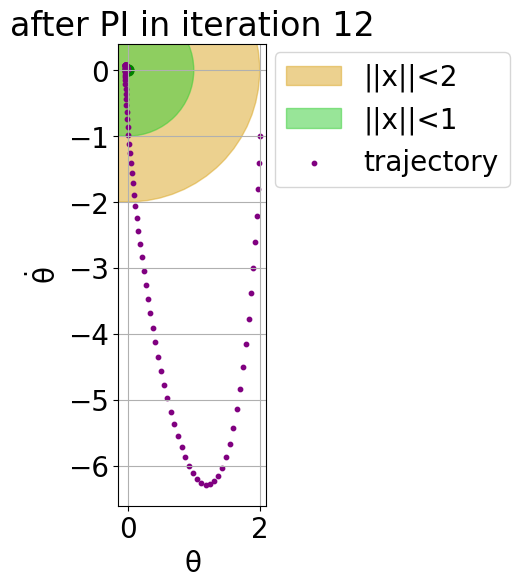

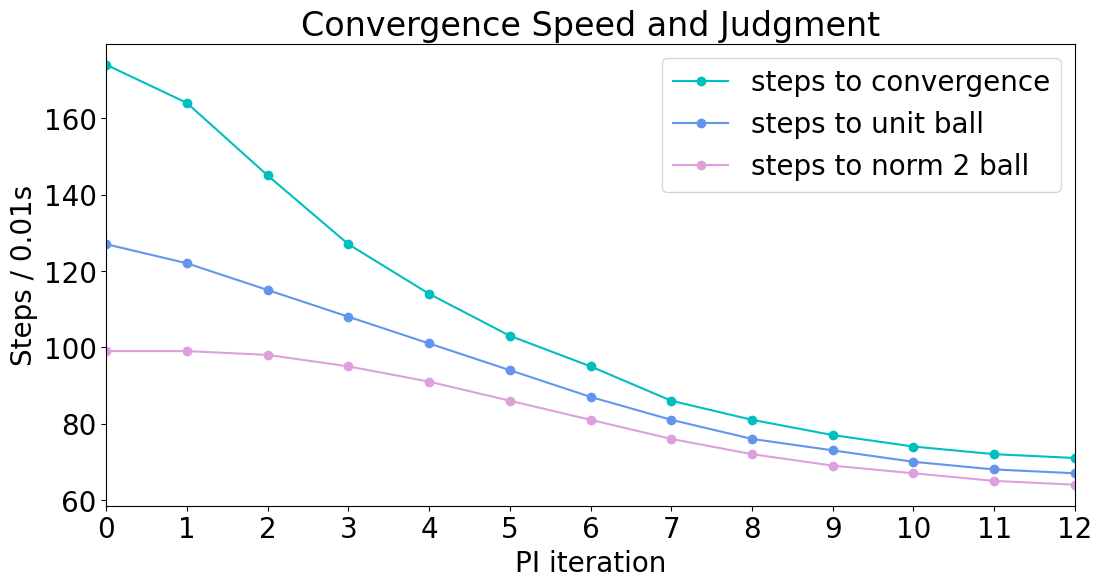

[174, 164, 145, 127, 114, 103, 95, 86, 81, 77, 74, 72, 71]
[127, 122, 115, 108, 101, 94, 87, 81, 76, 73, 70, 68, 67]
[99, 99, 98, 95, 91, 86, 81, 76, 72, 69, 67, 65, 64]
---------------------------------Iteration 13-------------------------------
---------------------Sampling Training Data---------------------
--------------------------Learning V----------------------------
Epoch [1000/1000], Loss: 0.9400892258
L0:tensor([0.0448], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.0, 
torch.sum(F.relu(dL)):0.0
--------------------------Soft Update---------------------------
--------------------------Learning D----------------------------
Epoch [1000/1000], Loss: 10.0478734970
torch.sum(loss_fn(dL, DV_ext)):9.459243774414062, 
torch.sum(F.relu(DV)):0.0, 
D0:tensor([-0.3242], device='cuda:0', grad_fn=<SelectBackward0>)
------------------------Improveing Policy-----------------------
--------------------------Soft Update---------------------------
---------------------Sampling Training Da

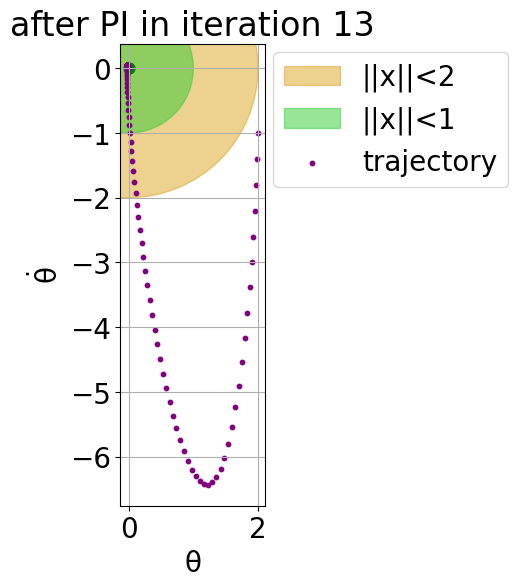

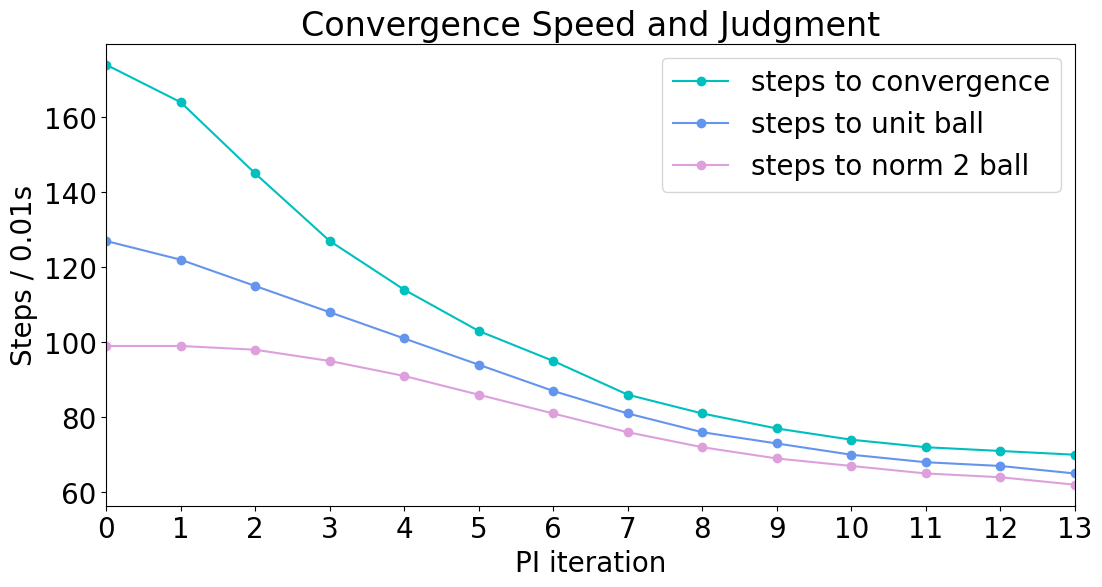

[174, 164, 145, 127, 114, 103, 95, 86, 81, 77, 74, 72, 71, 70]
[127, 122, 115, 108, 101, 94, 87, 81, 76, 73, 70, 68, 67, 65]
[99, 99, 98, 95, 91, 86, 81, 76, 72, 69, 67, 65, 64, 62]
---------------------------------Iteration 14-------------------------------
---------------------Sampling Training Data---------------------
--------------------------Learning V----------------------------
Epoch [1000/1000], Loss: 0.9502772093
L0:tensor([-0.0013], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.0, 
torch.sum(F.relu(dL)):0.0
--------------------------Soft Update---------------------------
--------------------------Learning D----------------------------
Epoch [1000/1000], Loss: 15.2852230072
torch.sum(loss_fn(dL, DV_ext)):14.762743949890137, 
torch.sum(F.relu(DV)):0.0, 
D0:tensor([-0.1684], device='cuda:0', grad_fn=<SelectBackward0>)
------------------------Improveing Policy-----------------------
--------------------------Soft Update---------------------------
---------------------Sampli

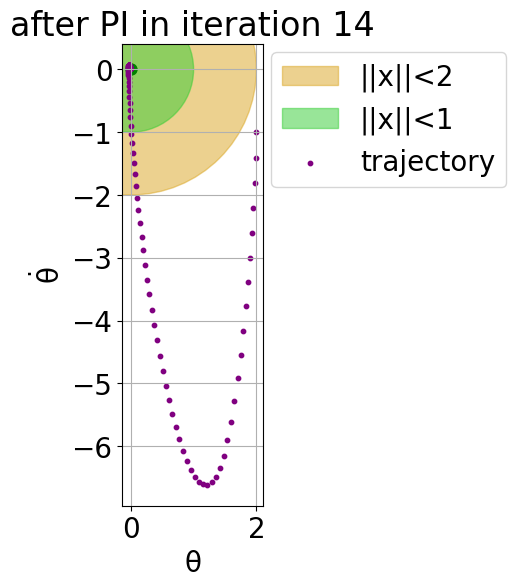

[174, 164, 145, 127, 114, 103, 95, 86, 81, 77, 74, 72, 71, 70, 68]
[127, 122, 115, 108, 101, 94, 87, 81, 76, 73, 70, 68, 67, 65, 64]
[99, 99, 98, 95, 91, 86, 81, 76, 72, 69, 67, 65, 64, 62, 61]
---------------------------------Iteration 15-------------------------------
---------------------Sampling Training Data---------------------
--------------------------Learning V----------------------------
Epoch [1000/1000], Loss: 0.9602345228
L0:tensor([0.0751], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.0, 
torch.sum(F.relu(dL)):0.0
--------------------------Soft Update---------------------------
--------------------------Learning D----------------------------
Epoch [1000/1000], Loss: 30.1898899078
torch.sum(loss_fn(dL, DV_ext)):29.554302215576172, 
torch.sum(F.relu(DV)):0.0, 
D0:tensor([-0.3796], device='cuda:0', grad_fn=<SelectBackward0>)
------------------------Improveing Policy-----------------------
--------------------------Soft Update---------------------------
----------------

[174, 164, 145, 127, 114, 103, 95, 86, 81, 77, 74, 72, 71, 70, 68, 67]
[127, 122, 115, 108, 101, 94, 87, 81, 76, 73, 70, 68, 67, 65, 64, 63]
[99, 99, 98, 95, 91, 86, 81, 76, 72, 69, 67, 65, 64, 62, 61, 61]
---------------------------------Iteration 16-------------------------------
---------------------Sampling Training Data---------------------
--------------------------Learning V----------------------------
Epoch [1000/1000], Loss: 0.9995844960
L0:tensor([0.0180], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.0, 
torch.sum(F.relu(dL)):0.0
--------------------------Soft Update---------------------------
--------------------------Learning D----------------------------
Epoch [1000/1000], Loss: 9.1070442200
torch.sum(loss_fn(dL, DV_ext)):8.573984146118164, 
torch.sum(F.relu(DV)):0.0, 
D0:tensor([-0.1167], device='cuda:0', grad_fn=<SelectBackward0>)
------------------------Improveing Policy-----------------------
--------------------------Soft Update---------------------------
------

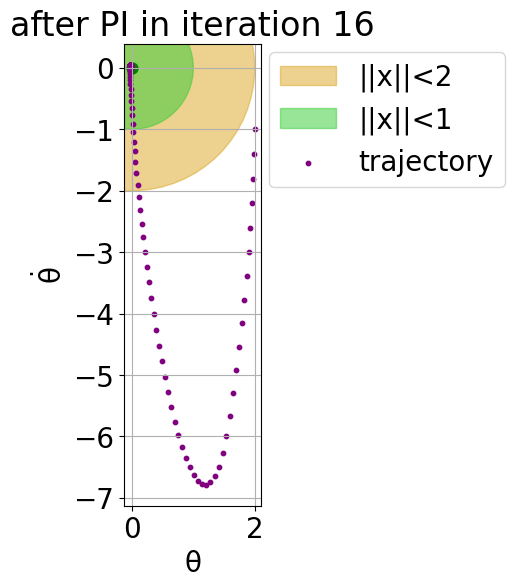

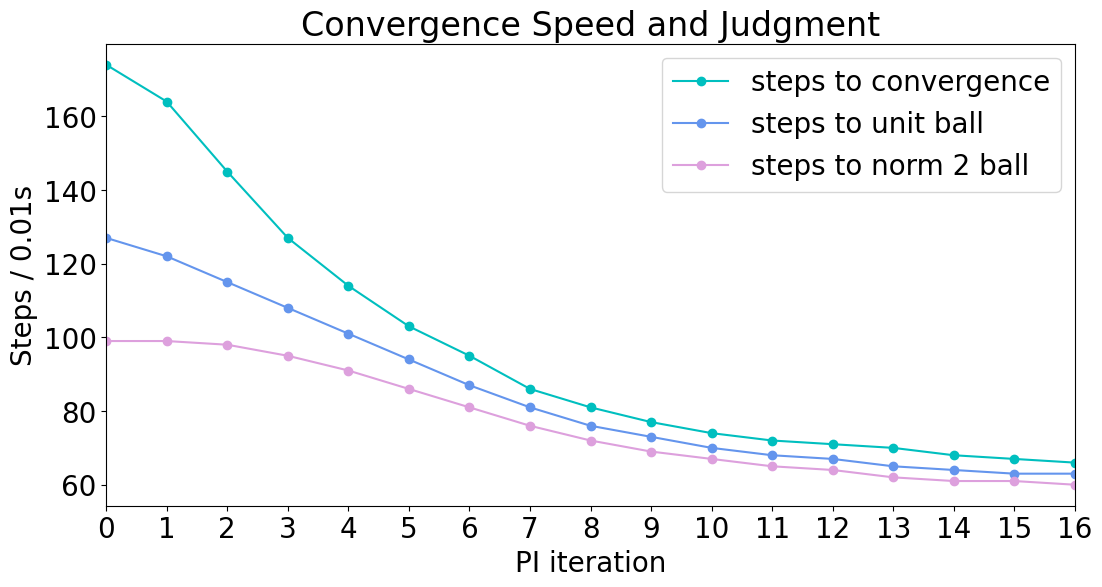

[174, 164, 145, 127, 114, 103, 95, 86, 81, 77, 74, 72, 71, 70, 68, 67, 66]
[127, 122, 115, 108, 101, 94, 87, 81, 76, 73, 70, 68, 67, 65, 64, 63, 63]
[99, 99, 98, 95, 91, 86, 81, 76, 72, 69, 67, 65, 64, 62, 61, 61, 60]
---------------------------------Iteration 17-------------------------------
---------------------Sampling Training Data---------------------
--------------------------Learning V----------------------------
Epoch [1000/1000], Loss: 0.9457156062
L0:tensor([0.0478], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.0, 
torch.sum(F.relu(dL)):0.0
--------------------------Soft Update---------------------------
--------------------------Learning D----------------------------
Epoch [1000/1000], Loss: 37.7471275330
torch.sum(loss_fn(dL, DV_ext)):37.111602783203125, 
torch.sum(F.relu(DV)):0.0, 
D0:tensor([-0.3457], device='cuda:0', grad_fn=<SelectBackward0>)
------------------------Improveing Policy-----------------------
--------------------------Soft Update--------------------

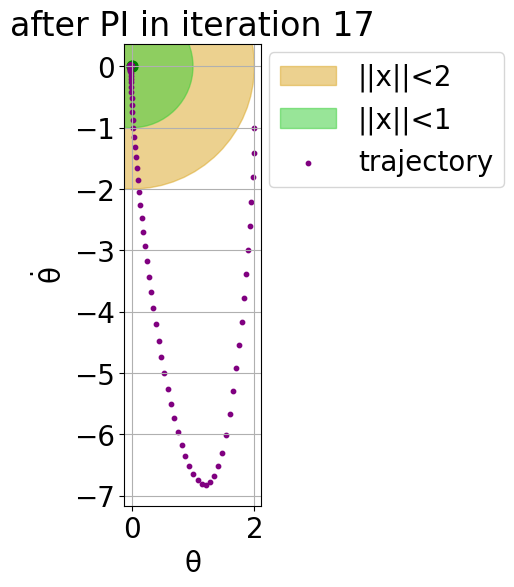

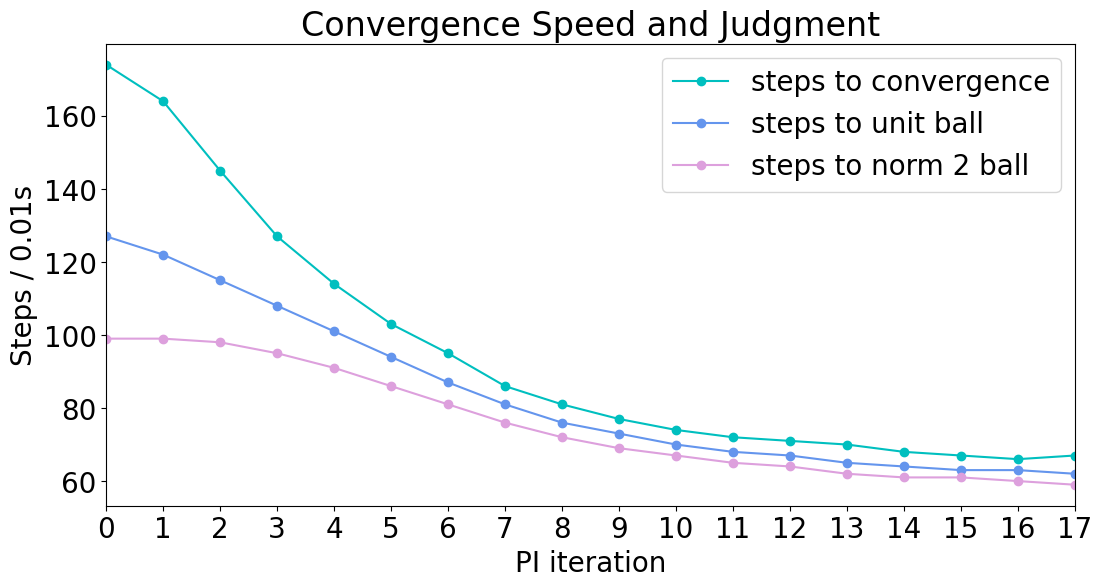

[174, 164, 145, 127, 114, 103, 95, 86, 81, 77, 74, 72, 71, 70, 68, 67, 66, 67]
[127, 122, 115, 108, 101, 94, 87, 81, 76, 73, 70, 68, 67, 65, 64, 63, 63, 62]
[99, 99, 98, 95, 91, 86, 81, 76, 72, 69, 67, 65, 64, 62, 61, 61, 60, 59]
---------------------------------Iteration 18-------------------------------
---------------------Sampling Training Data---------------------
--------------------------Learning V----------------------------
Epoch [1000/1000], Loss: 0.9548909664
L0:tensor([0.0603], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.0, 
torch.sum(F.relu(dL)):0.0
--------------------------Soft Update---------------------------
--------------------------Learning D----------------------------
Epoch [1000/1000], Loss: 17.9316177368
torch.sum(loss_fn(dL, DV_ext)):17.234996795654297, 
torch.sum(F.relu(DV)):0.0, 
D0:tensor([-0.4242], device='cuda:0', grad_fn=<SelectBackward0>)
------------------------Improveing Policy-----------------------
--------------------------Soft Update--------

[174, 164, 145, 127, 114, 103, 95, 86, 81, 77, 74, 72, 71, 70, 68, 67, 66, 67, 67]
[127, 122, 115, 108, 101, 94, 87, 81, 76, 73, 70, 68, 67, 65, 64, 63, 63, 62, 62]
[99, 99, 98, 95, 91, 86, 81, 76, 72, 69, 67, 65, 64, 62, 61, 61, 60, 59, 59]
---------------------------------Iteration 19-------------------------------
---------------------Sampling Training Data---------------------
--------------------------Learning V----------------------------
Epoch [1000/1000], Loss: 0.9481901526
L0:tensor([0.0254], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.0, 
torch.sum(F.relu(dL)):0.0
--------------------------Soft Update---------------------------
--------------------------Learning D----------------------------
Epoch [1000/1000], Loss: 7.4522132874
torch.sum(loss_fn(dL, DV_ext)):6.861390113830566, 
torch.sum(F.relu(DV)):0.0, 
D0:tensor([-0.2386], device='cuda:0', grad_fn=<SelectBackward0>)
------------------------Improveing Policy-----------------------
--------------------------Soft Upda

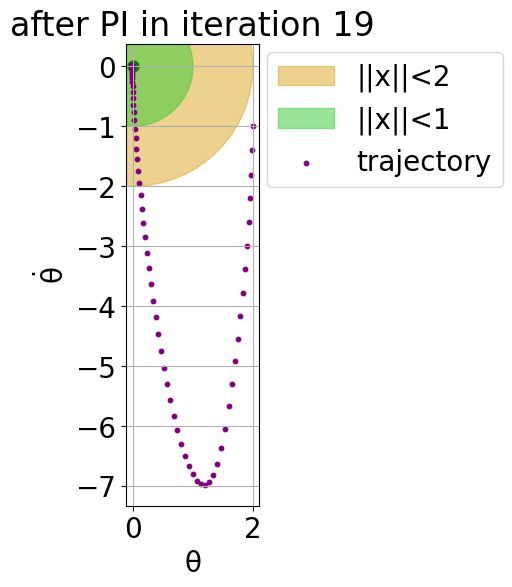

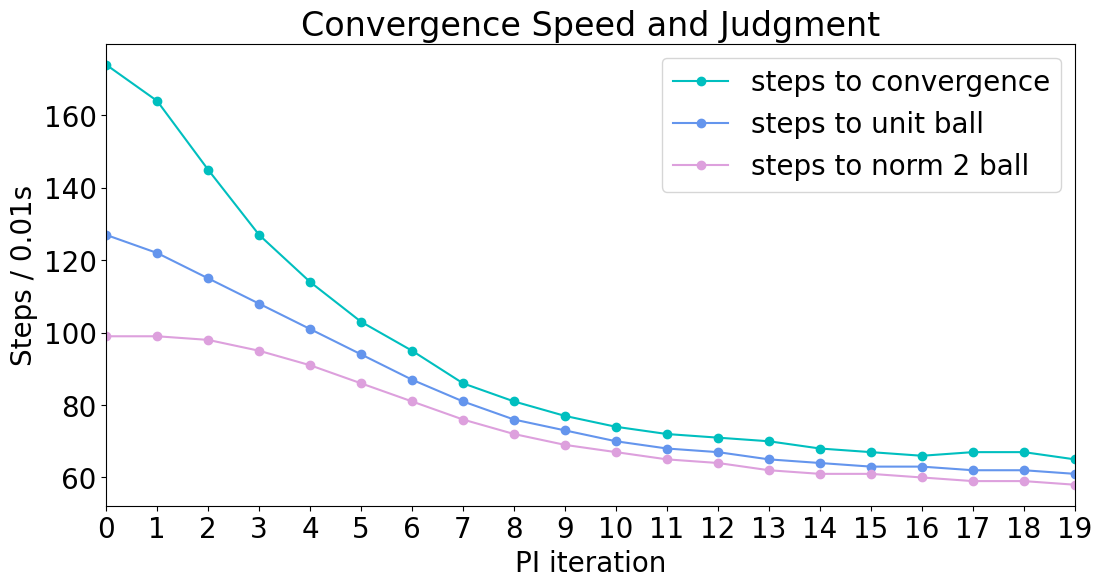

[174, 164, 145, 127, 114, 103, 95, 86, 81, 77, 74, 72, 71, 70, 68, 67, 66, 67, 67, 65]
[127, 122, 115, 108, 101, 94, 87, 81, 76, 73, 70, 68, 67, 65, 64, 63, 63, 62, 62, 61]
[99, 99, 98, 95, 91, 86, 81, 76, 72, 69, 67, 65, 64, 62, 61, 61, 60, 59, 59, 58]
---------------------------------Iteration 20-------------------------------
---------------------Sampling Training Data---------------------
--------------------------Learning V----------------------------
Epoch [1000/1000], Loss: 0.9552218914
L0:tensor([0.0221], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.0, 
torch.sum(F.relu(dL)):0.0
--------------------------Soft Update---------------------------
--------------------------Learning D----------------------------
Epoch [1000/1000], Loss: 47.1037788391
torch.sum(loss_fn(dL, DV_ext)):46.51765060424805, 
torch.sum(F.relu(DV)):0.0, 
D0:tensor([-0.2282], device='cuda:0', grad_fn=<SelectBackward0>)
------------------------Improveing Policy-----------------------
----------------------

[174, 164, 145, 127, 114, 103, 95, 86, 81, 77, 74, 72, 71, 70, 68, 67, 66, 67, 67, 65, 63]
[127, 122, 115, 108, 101, 94, 87, 81, 76, 73, 70, 68, 67, 65, 64, 63, 63, 62, 62, 61, 60]
[99, 99, 98, 95, 91, 86, 81, 76, 72, 69, 67, 65, 64, 62, 61, 61, 60, 59, 59, 58, 57]
---------------------------------Iteration 21-------------------------------
---------------------Sampling Training Data---------------------
--------------------------Learning V----------------------------
Epoch [1000/1000], Loss: 0.9619062543
L0:tensor([0.0510], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.0, 
torch.sum(F.relu(dL)):0.0
--------------------------Soft Update---------------------------
--------------------------Learning D----------------------------
Epoch [1000/1000], Loss: 17.6829147339
torch.sum(loss_fn(dL, DV_ext)):17.089746475219727, 
torch.sum(F.relu(DV)):0.0, 
D0:tensor([-0.2464], device='cuda:0', grad_fn=<SelectBackward0>)
------------------------Improveing Policy-----------------------
---------

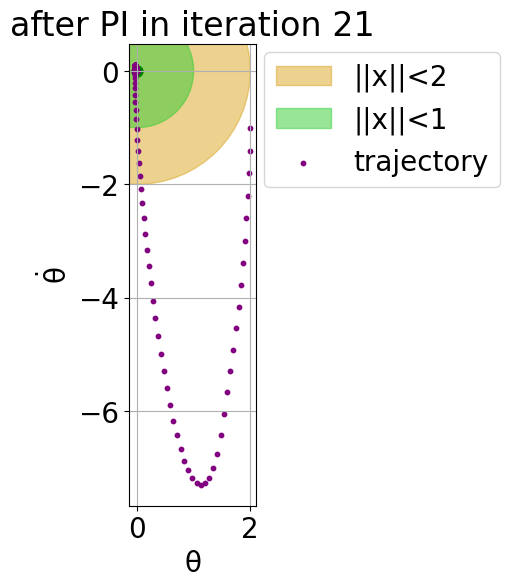

[174, 164, 145, 127, 114, 103, 95, 86, 81, 77, 74, 72, 71, 70, 68, 67, 66, 67, 67, 65, 63, 61]
[127, 122, 115, 108, 101, 94, 87, 81, 76, 73, 70, 68, 67, 65, 64, 63, 63, 62, 62, 61, 60, 59]
[99, 99, 98, 95, 91, 86, 81, 76, 72, 69, 67, 65, 64, 62, 61, 61, 60, 59, 59, 58, 57, 57]
---------------------------------Iteration 22-------------------------------
---------------------Sampling Training Data---------------------
--------------------------Learning V----------------------------
Epoch [1000/1000], Loss: 0.9589507580
L0:tensor([-0.0029], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.0, 
torch.sum(F.relu(dL)):0.0
--------------------------Soft Update---------------------------
--------------------------Learning D----------------------------
Epoch [1000/1000], Loss: 27.4947223663
torch.sum(loss_fn(dL, DV_ext)):26.8718318939209, 
torch.sum(F.relu(DV)):0.0, 
D0:tensor([-0.2995], device='cuda:0', grad_fn=<SelectBackward0>)
------------------------Improveing Policy----------------------

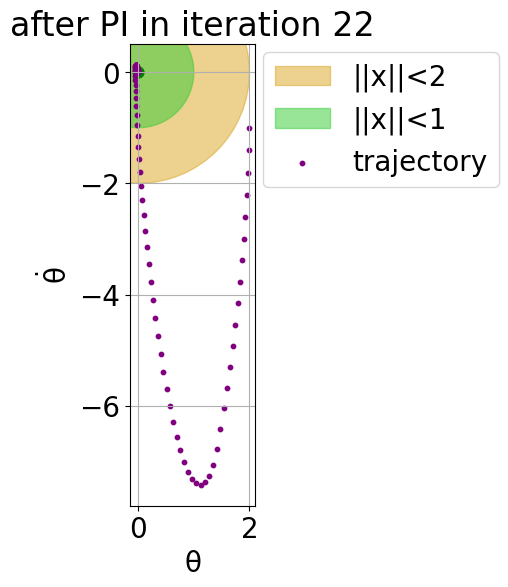

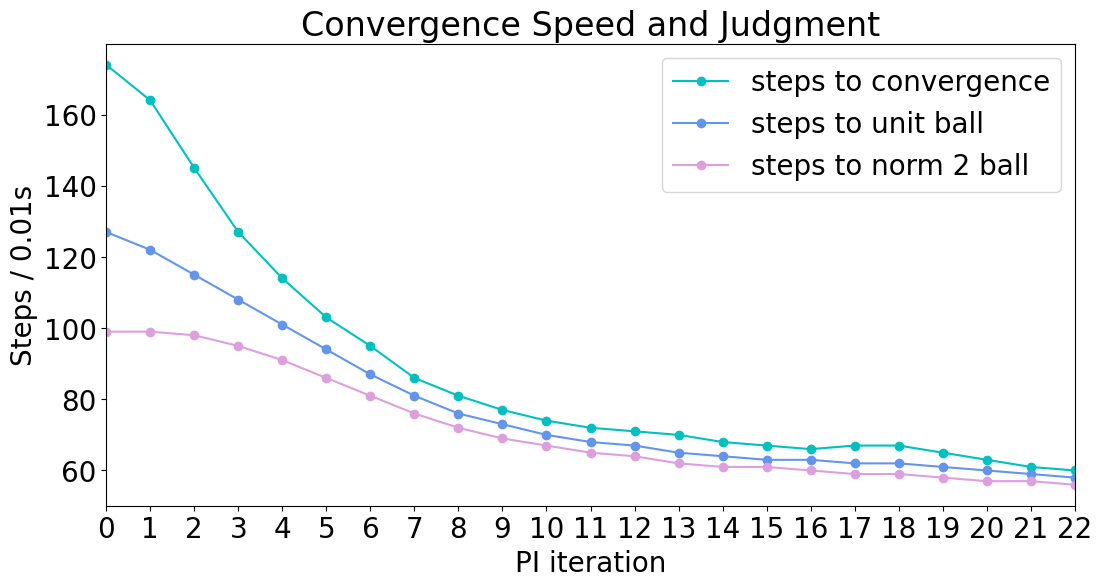

[174, 164, 145, 127, 114, 103, 95, 86, 81, 77, 74, 72, 71, 70, 68, 67, 66, 67, 67, 65, 63, 61, 60]
[127, 122, 115, 108, 101, 94, 87, 81, 76, 73, 70, 68, 67, 65, 64, 63, 63, 62, 62, 61, 60, 59, 58]
[99, 99, 98, 95, 91, 86, 81, 76, 72, 69, 67, 65, 64, 62, 61, 61, 60, 59, 59, 58, 57, 57, 56]
---------------------------------Iteration 23-------------------------------
---------------------Sampling Training Data---------------------
--------------------------Learning V----------------------------
Epoch [1000/1000], Loss: 0.9694399238
L0:tensor([0.0217], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.0, 
torch.sum(F.relu(dL)):0.0
--------------------------Soft Update---------------------------
--------------------------Learning D----------------------------
Epoch [1000/1000], Loss: 33.3427467346
torch.sum(loss_fn(dL, DV_ext)):32.59109115600586, 
torch.sum(F.relu(DV)):0.0, 
D0:tensor([-0.4705], device='cuda:0', grad_fn=<SelectBackward0>)
------------------------Improveing Policy----------

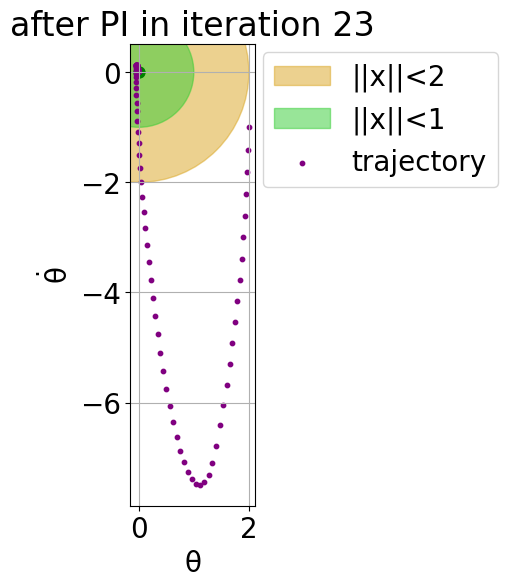

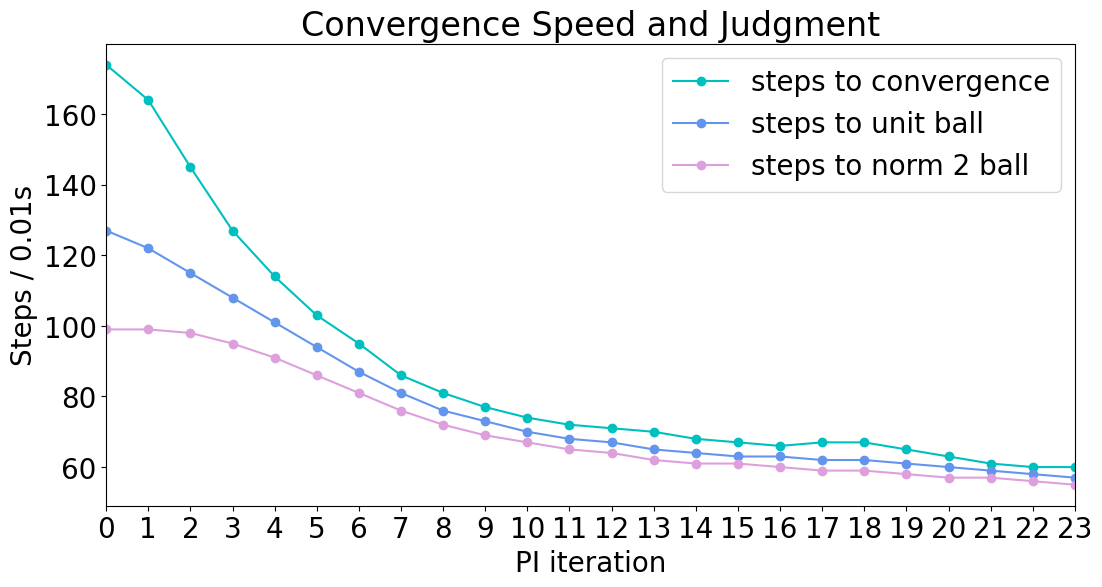

[174, 164, 145, 127, 114, 103, 95, 86, 81, 77, 74, 72, 71, 70, 68, 67, 66, 67, 67, 65, 63, 61, 60, 60]
[127, 122, 115, 108, 101, 94, 87, 81, 76, 73, 70, 68, 67, 65, 64, 63, 63, 62, 62, 61, 60, 59, 58, 57]
[99, 99, 98, 95, 91, 86, 81, 76, 72, 69, 67, 65, 64, 62, 61, 61, 60, 59, 59, 58, 57, 57, 56, 55]
---------------------------------Iteration 24-------------------------------
---------------------Sampling Training Data---------------------
--------------------------Learning V----------------------------
Epoch [1000/1000], Loss: 1.0003484488
L0:tensor([0.0938], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.0, 
torch.sum(F.relu(dL)):0.0
--------------------------Soft Update---------------------------
--------------------------Learning D----------------------------
Epoch [1000/1000], Loss: 38.7209510803
torch.sum(loss_fn(dL, DV_ext)):37.9266357421875, 
torch.sum(F.relu(DV)):0.0, 
D0:tensor([-0.5123], device='cuda:0', grad_fn=<SelectBackward0>)
------------------------Improveing Polic

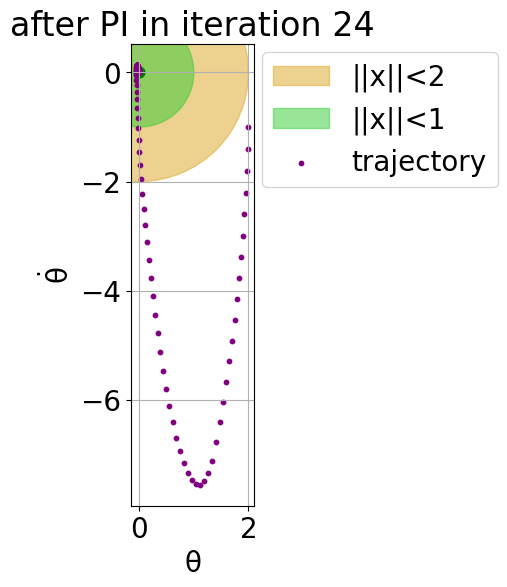

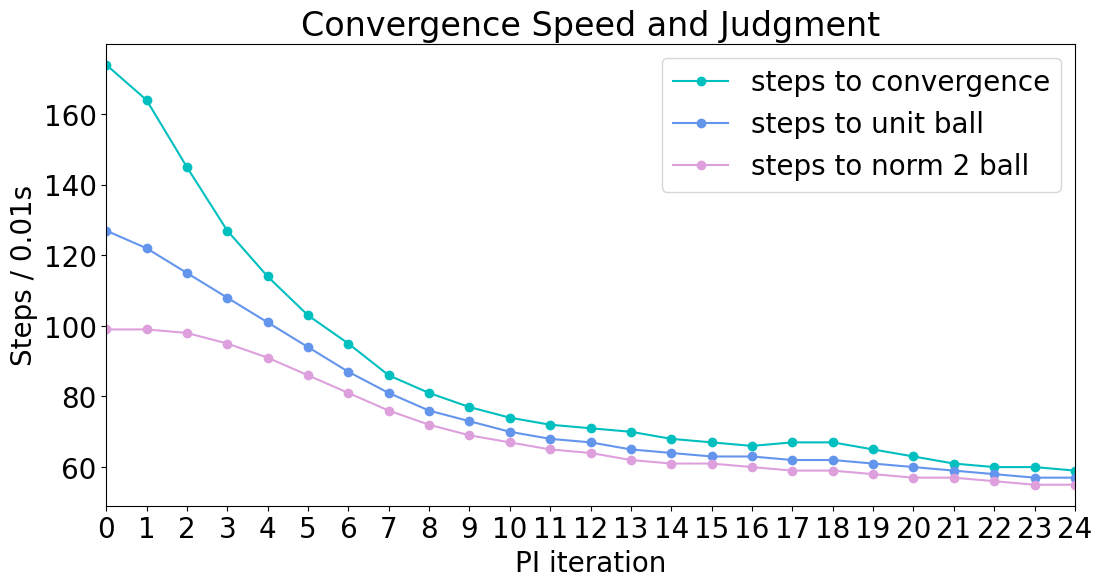

[174, 164, 145, 127, 114, 103, 95, 86, 81, 77, 74, 72, 71, 70, 68, 67, 66, 67, 67, 65, 63, 61, 60, 60, 59]
[127, 122, 115, 108, 101, 94, 87, 81, 76, 73, 70, 68, 67, 65, 64, 63, 63, 62, 62, 61, 60, 59, 58, 57, 57]
[99, 99, 98, 95, 91, 86, 81, 76, 72, 69, 67, 65, 64, 62, 61, 61, 60, 59, 59, 58, 57, 57, 56, 55, 55]
---------------------------------Iteration 25-------------------------------
---------------------Sampling Training Data---------------------
--------------------------Learning V----------------------------
Epoch [1000/1000], Loss: 1.0124516487
L0:tensor([-0.0009], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.0, 
torch.sum(F.relu(dL)):0.0
--------------------------Soft Update---------------------------
--------------------------Learning D----------------------------
Epoch [1000/1000], Loss: 17.2174243927
torch.sum(loss_fn(dL, DV_ext)):16.44297981262207, 
torch.sum(F.relu(DV)):0.0, 
D0:tensor([-0.4857], device='cuda:0', grad_fn=<SelectBackward0>)
------------------------Im

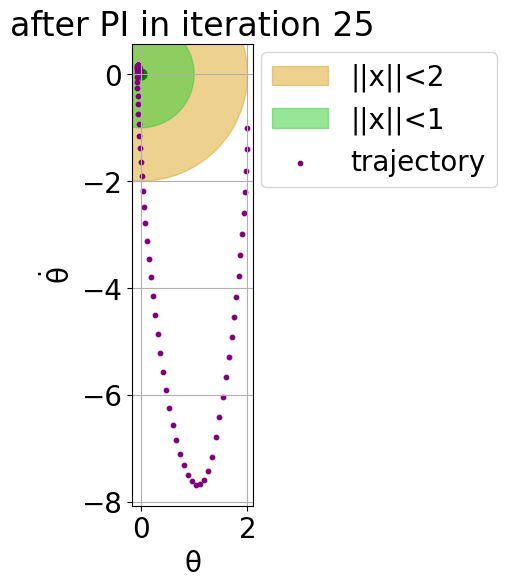

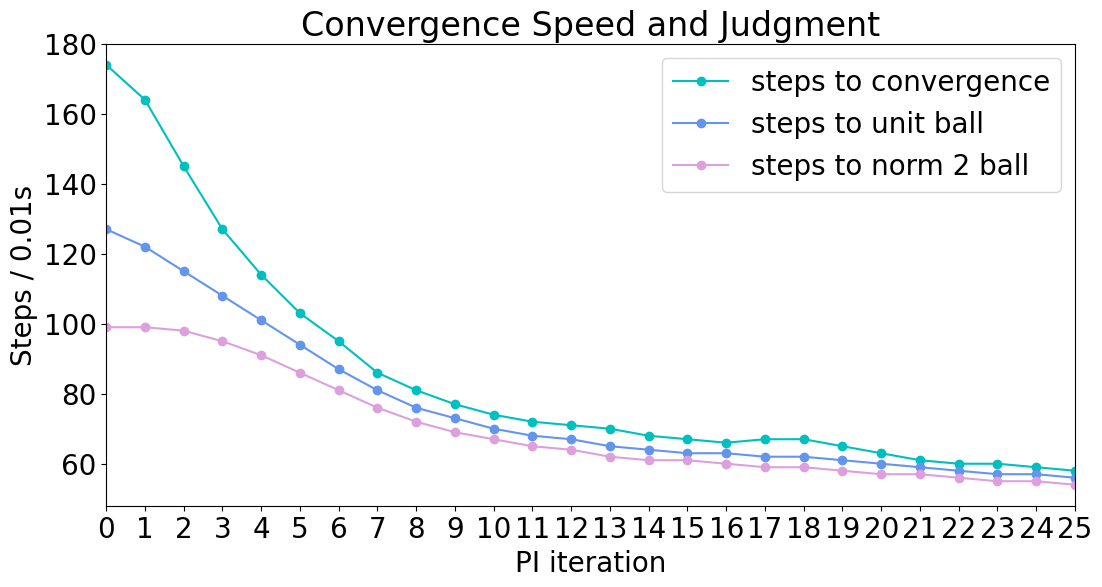

[174, 164, 145, 127, 114, 103, 95, 86, 81, 77, 74, 72, 71, 70, 68, 67, 66, 67, 67, 65, 63, 61, 60, 60, 59, 58]
[127, 122, 115, 108, 101, 94, 87, 81, 76, 73, 70, 68, 67, 65, 64, 63, 63, 62, 62, 61, 60, 59, 58, 57, 57, 56]
[99, 99, 98, 95, 91, 86, 81, 76, 72, 69, 67, 65, 64, 62, 61, 61, 60, 59, 59, 58, 57, 57, 56, 55, 55, 54]
---------------------------------Iteration 26-------------------------------
---------------------Sampling Training Data---------------------
--------------------------Learning V----------------------------
Epoch [1000/1000], Loss: 1.0777733326
L0:tensor([0.2045], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.0, 
torch.sum(F.relu(dL)):0.0
--------------------------Soft Update---------------------------
--------------------------Learning D----------------------------
Epoch [1000/1000], Loss: 23.3991737366
torch.sum(loss_fn(dL, DV_ext)):22.818164825439453, 
torch.sum(F.relu(DV)):0.0, 
D0:tensor([-0.1725], device='cuda:0', grad_fn=<SelectBackward0>)
--------------

[174, 164, 145, 127, 114, 103, 95, 86, 81, 77, 74, 72, 71, 70, 68, 67, 66, 67, 67, 65, 63, 61, 60, 60, 59, 58, 91]
[127, 122, 115, 108, 101, 94, 87, 81, 76, 73, 70, 68, 67, 65, 64, 63, 63, 62, 62, 61, 60, 59, 58, 57, 57, 56, 55]
[99, 99, 98, 95, 91, 86, 81, 76, 72, 69, 67, 65, 64, 62, 61, 61, 60, 59, 59, 58, 57, 57, 56, 55, 55, 54, 54]
---------------------------------Iteration 27-------------------------------
---------------------Sampling Training Data---------------------
--------------------------Learning V----------------------------
Epoch [1000/1000], Loss: 1.0302339792
L0:tensor([0.0197], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.0, 
torch.sum(F.relu(dL)):0.0
--------------------------Soft Update---------------------------
--------------------------Learning D----------------------------
Epoch [1000/1000], Loss: 36.3478584290
torch.sum(loss_fn(dL, DV_ext)):35.497589111328125, 
torch.sum(F.relu(DV)):0.0, 
D0:tensor([-0.5478], device='cuda:0', grad_fn=<SelectBackward0>)
--

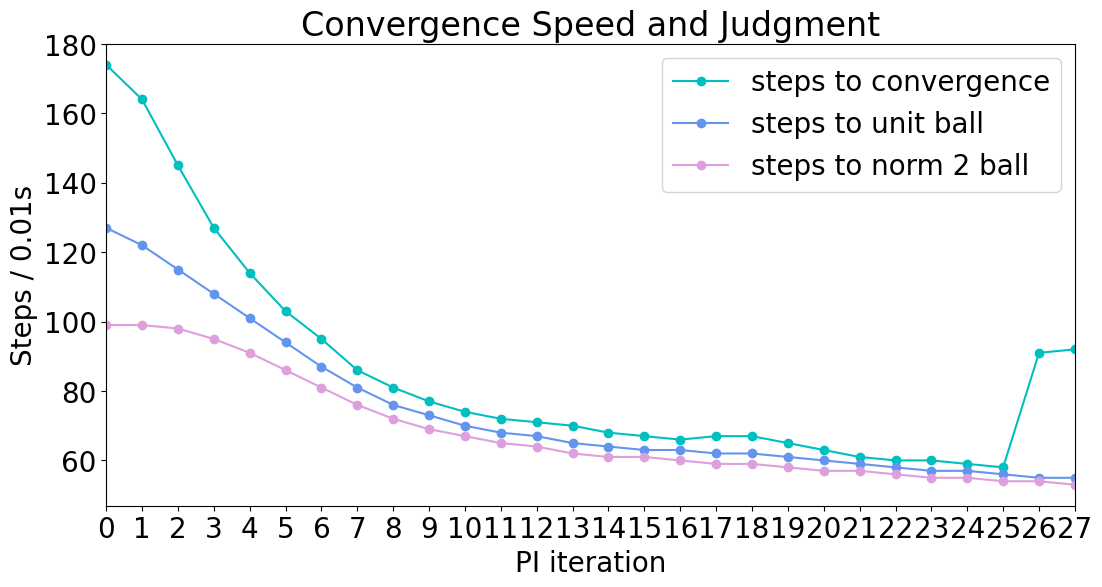

[174, 164, 145, 127, 114, 103, 95, 86, 81, 77, 74, 72, 71, 70, 68, 67, 66, 67, 67, 65, 63, 61, 60, 60, 59, 58, 91, 92]
[127, 122, 115, 108, 101, 94, 87, 81, 76, 73, 70, 68, 67, 65, 64, 63, 63, 62, 62, 61, 60, 59, 58, 57, 57, 56, 55, 55]
[99, 99, 98, 95, 91, 86, 81, 76, 72, 69, 67, 65, 64, 62, 61, 61, 60, 59, 59, 58, 57, 57, 56, 55, 55, 54, 54, 53]
---------------------------------Iteration 28-------------------------------
---------------------Sampling Training Data---------------------
--------------------------Learning V----------------------------
Epoch [1000/1000], Loss: 1.1235710382
L0:tensor([0.2038], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.0, 
torch.sum(F.relu(dL)):0.0
--------------------------Soft Update---------------------------
--------------------------Learning D----------------------------
Epoch [1000/1000], Loss: 28.8672657013
torch.sum(loss_fn(dL, DV_ext)):28.103384017944336, 
torch.sum(F.relu(DV)):0.0, 
D0:tensor([-0.4623], device='cuda:0', grad_fn=<SelectBa

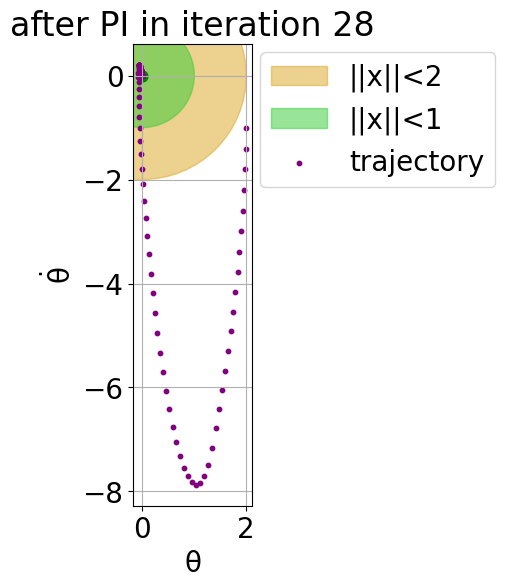

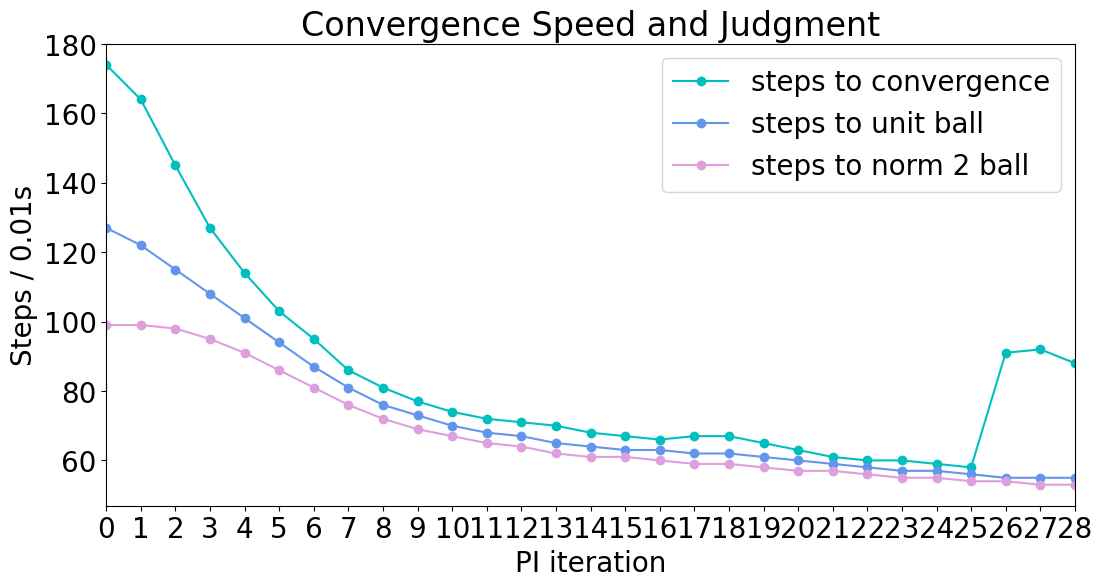

[174, 164, 145, 127, 114, 103, 95, 86, 81, 77, 74, 72, 71, 70, 68, 67, 66, 67, 67, 65, 63, 61, 60, 60, 59, 58, 91, 92, 88]
[127, 122, 115, 108, 101, 94, 87, 81, 76, 73, 70, 68, 67, 65, 64, 63, 63, 62, 62, 61, 60, 59, 58, 57, 57, 56, 55, 55, 55]
[99, 99, 98, 95, 91, 86, 81, 76, 72, 69, 67, 65, 64, 62, 61, 61, 60, 59, 59, 58, 57, 57, 56, 55, 55, 54, 54, 53, 53]
---------------------------------Iteration 29-------------------------------
---------------------Sampling Training Data---------------------
--------------------------Learning V----------------------------
Epoch [1000/1000], Loss: 1.0454759598
L0:tensor([0.0003], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.0, 
torch.sum(F.relu(dL)):0.0
--------------------------Soft Update---------------------------
--------------------------Learning D----------------------------
Epoch [1000/1000], Loss: 10.9765911102
torch.sum(loss_fn(dL, DV_ext)):10.161883354187012, 
torch.sum(F.relu(DV)):0.0, 
D0:tensor([-0.4978], device='cuda:0', grad_

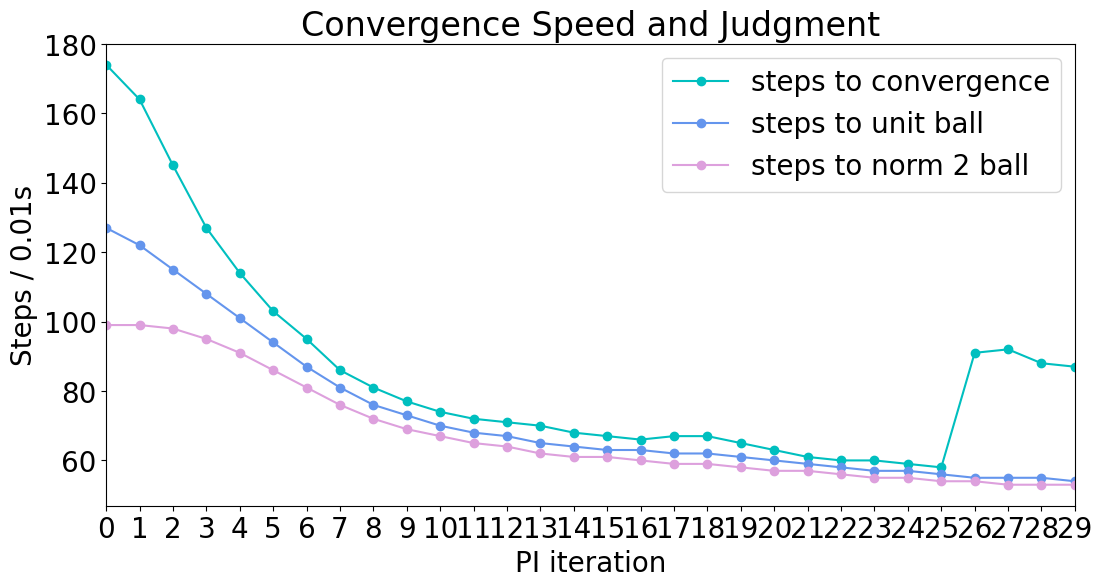

[174, 164, 145, 127, 114, 103, 95, 86, 81, 77, 74, 72, 71, 70, 68, 67, 66, 67, 67, 65, 63, 61, 60, 60, 59, 58, 91, 92, 88, 87]
[127, 122, 115, 108, 101, 94, 87, 81, 76, 73, 70, 68, 67, 65, 64, 63, 63, 62, 62, 61, 60, 59, 58, 57, 57, 56, 55, 55, 55, 54]
[99, 99, 98, 95, 91, 86, 81, 76, 72, 69, 67, 65, 64, 62, 61, 61, 60, 59, 59, 58, 57, 57, 56, 55, 55, 54, 54, 53, 53, 53]
---------------------------------Iteration 30-------------------------------
---------------------Sampling Training Data---------------------
--------------------------Learning V----------------------------
Epoch [1000/1000], Loss: 1.0863103867
L0:tensor([0.1624], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.0, 
torch.sum(F.relu(dL)):0.0
--------------------------Soft Update---------------------------
--------------------------Learning D----------------------------
Epoch [1000/1000], Loss: 46.0005836487
torch.sum(loss_fn(dL, DV_ext)):45.361549377441406, 
torch.sum(F.relu(DV)):0.0, 
D0:tensor([-0.2664], device='cu

[174, 164, 145, 127, 114, 103, 95, 86, 81, 77, 74, 72, 71, 70, 68, 67, 66, 67, 67, 65, 63, 61, 60, 60, 59, 58, 91, 92, 88, 87, 56]
[127, 122, 115, 108, 101, 94, 87, 81, 76, 73, 70, 68, 67, 65, 64, 63, 63, 62, 62, 61, 60, 59, 58, 57, 57, 56, 55, 55, 55, 54, 54]
[99, 99, 98, 95, 91, 86, 81, 76, 72, 69, 67, 65, 64, 62, 61, 61, 60, 59, 59, 58, 57, 57, 56, 55, 55, 54, 54, 53, 53, 53, 53]
---------------------------------Iteration 31-------------------------------
---------------------Sampling Training Data---------------------
--------------------------Learning V----------------------------
Epoch [1000/1000], Loss: 1.0825754404
L0:tensor([0.0053], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.0, 
torch.sum(F.relu(dL)):0.0
--------------------------Soft Update---------------------------
--------------------------Learning D----------------------------
Epoch [1000/1000], Loss: 24.1990051270
torch.sum(loss_fn(dL, DV_ext)):23.486360549926758, 
torch.sum(F.relu(DV)):0.0, 
D0:tensor([-0.3801]

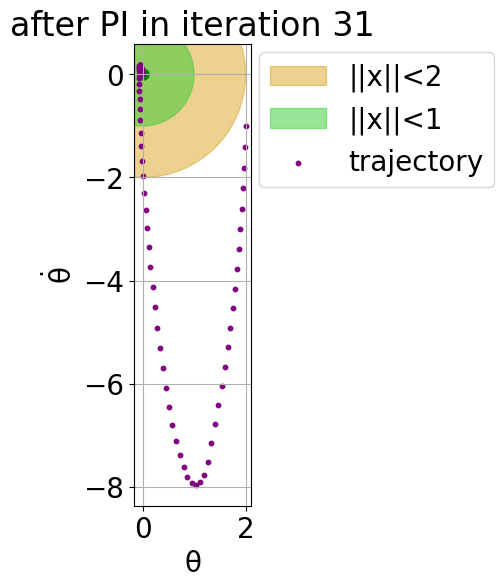

[174, 164, 145, 127, 114, 103, 95, 86, 81, 77, 74, 72, 71, 70, 68, 67, 66, 67, 67, 65, 63, 61, 60, 60, 59, 58, 91, 92, 88, 87, 56, 56]
[127, 122, 115, 108, 101, 94, 87, 81, 76, 73, 70, 68, 67, 65, 64, 63, 63, 62, 62, 61, 60, 59, 58, 57, 57, 56, 55, 55, 55, 54, 54, 54]
[99, 99, 98, 95, 91, 86, 81, 76, 72, 69, 67, 65, 64, 62, 61, 61, 60, 59, 59, 58, 57, 57, 56, 55, 55, 54, 54, 53, 53, 53, 53, 52]
---------------------------------Iteration 32-------------------------------
---------------------Sampling Training Data---------------------
--------------------------Learning V----------------------------
Epoch [1000/1000], Loss: 1.1025663614
L0:tensor([0.1244], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:2.0179822968202643e-06, 
torch.sum(F.relu(dL)):0.0
--------------------------Soft Update---------------------------
--------------------------Learning D----------------------------
Epoch [1000/1000], Loss: 35.7561721802
torch.sum(loss_fn(dL, DV_ext)):34.829254150390625, 
torch.sum(F.relu

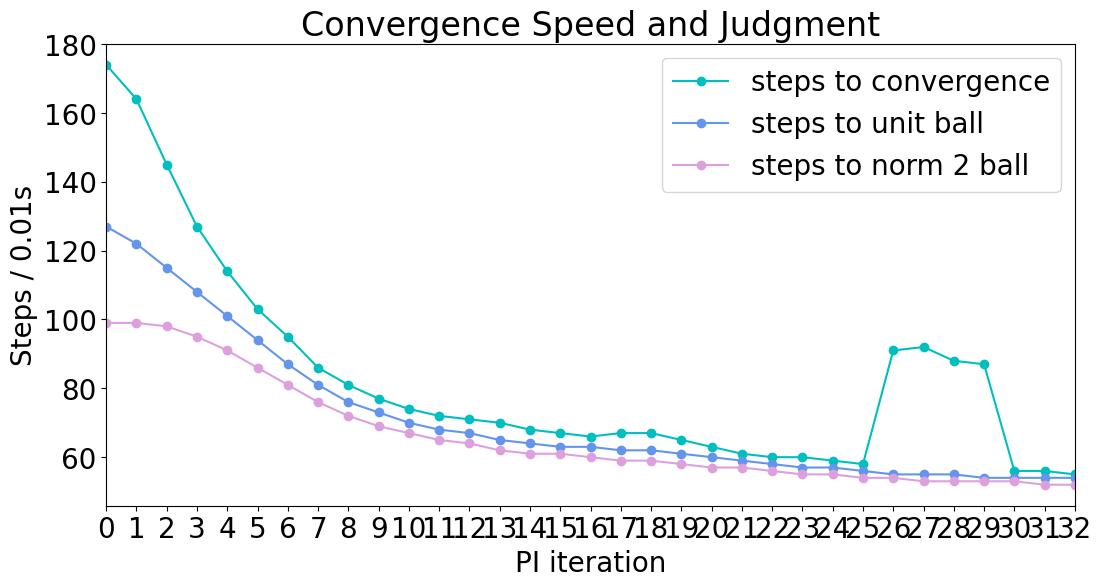

[174, 164, 145, 127, 114, 103, 95, 86, 81, 77, 74, 72, 71, 70, 68, 67, 66, 67, 67, 65, 63, 61, 60, 60, 59, 58, 91, 92, 88, 87, 56, 56, 55]
[127, 122, 115, 108, 101, 94, 87, 81, 76, 73, 70, 68, 67, 65, 64, 63, 63, 62, 62, 61, 60, 59, 58, 57, 57, 56, 55, 55, 55, 54, 54, 54, 54]
[99, 99, 98, 95, 91, 86, 81, 76, 72, 69, 67, 65, 64, 62, 61, 61, 60, 59, 59, 58, 57, 57, 56, 55, 55, 54, 54, 53, 53, 53, 53, 52, 52]
---------------------------------Iteration 33-------------------------------
---------------------Sampling Training Data---------------------
--------------------------Learning V----------------------------
Epoch [1000/1000], Loss: 1.1219340563
L0:tensor([-0.0007], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.0, 
torch.sum(F.relu(dL)):0.0
--------------------------Soft Update---------------------------
--------------------------Learning D----------------------------
Epoch [1000/1000], Loss: 31.4513607025
torch.sum(loss_fn(dL, DV_ext)):30.402786254882812, 
torch.sum(F.relu(DV)):

[174, 164, 145, 127, 114, 103, 95, 86, 81, 77, 74, 72, 71, 70, 68, 67, 66, 67, 67, 65, 63, 61, 60, 60, 59, 58, 91, 92, 88, 87, 56, 56, 55, 55]
[127, 122, 115, 108, 101, 94, 87, 81, 76, 73, 70, 68, 67, 65, 64, 63, 63, 62, 62, 61, 60, 59, 58, 57, 57, 56, 55, 55, 55, 54, 54, 54, 54, 53]
[99, 99, 98, 95, 91, 86, 81, 76, 72, 69, 67, 65, 64, 62, 61, 61, 60, 59, 59, 58, 57, 57, 56, 55, 55, 54, 54, 53, 53, 53, 53, 52, 52, 52]
---------------------------------Iteration 34-------------------------------
---------------------Sampling Training Data---------------------
--------------------------Learning V----------------------------
Epoch [1000/1000], Loss: 1.2168680429
L0:tensor([0.1887], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:3.110574107267894e-05, 
torch.sum(F.relu(dL)):0.0
--------------------------Soft Update---------------------------
--------------------------Learning D----------------------------
Epoch [1000/1000], Loss: 54.5545043945
torch.sum(loss_fn(dL, DV_ext)):53.50719451904

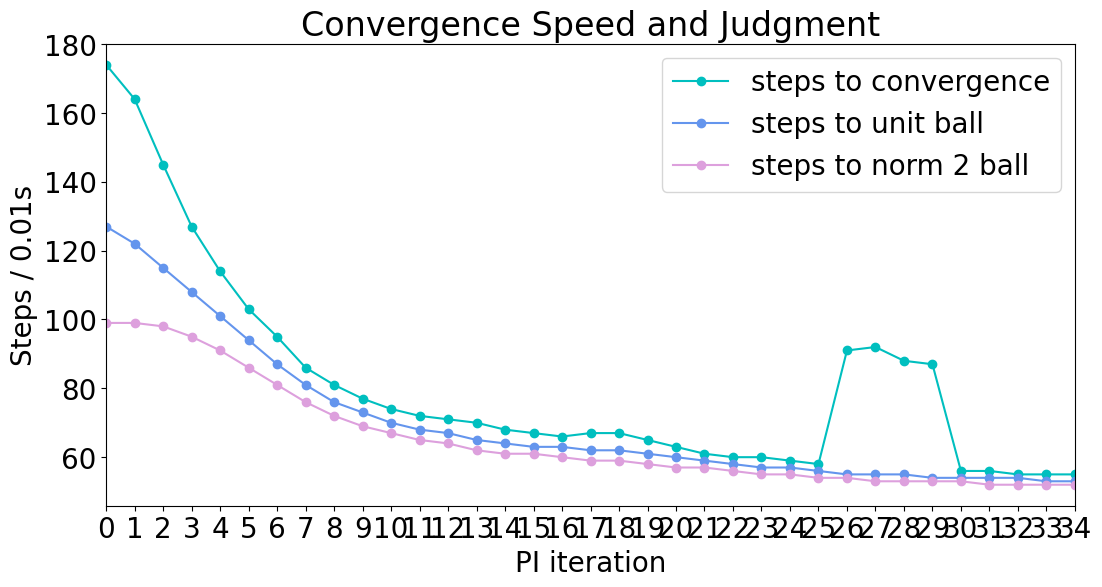

[174, 164, 145, 127, 114, 103, 95, 86, 81, 77, 74, 72, 71, 70, 68, 67, 66, 67, 67, 65, 63, 61, 60, 60, 59, 58, 91, 92, 88, 87, 56, 56, 55, 55, 55]
[127, 122, 115, 108, 101, 94, 87, 81, 76, 73, 70, 68, 67, 65, 64, 63, 63, 62, 62, 61, 60, 59, 58, 57, 57, 56, 55, 55, 55, 54, 54, 54, 54, 53, 53]
[99, 99, 98, 95, 91, 86, 81, 76, 72, 69, 67, 65, 64, 62, 61, 61, 60, 59, 59, 58, 57, 57, 56, 55, 55, 54, 54, 53, 53, 53, 53, 52, 52, 52, 52]
---------------------------------Iteration 35-------------------------------
---------------------Sampling Training Data---------------------
--------------------------Learning V----------------------------
Epoch [1000/1000], Loss: 1.2103229761
L0:tensor([0.0262], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.0, 
torch.sum(F.relu(dL)):0.05276203155517578
--------------------------Soft Update---------------------------
--------------------------Learning D----------------------------
Epoch [1000/1000], Loss: 44.0222816467
torch.sum(loss_fn(dL, DV_ext)):42.7

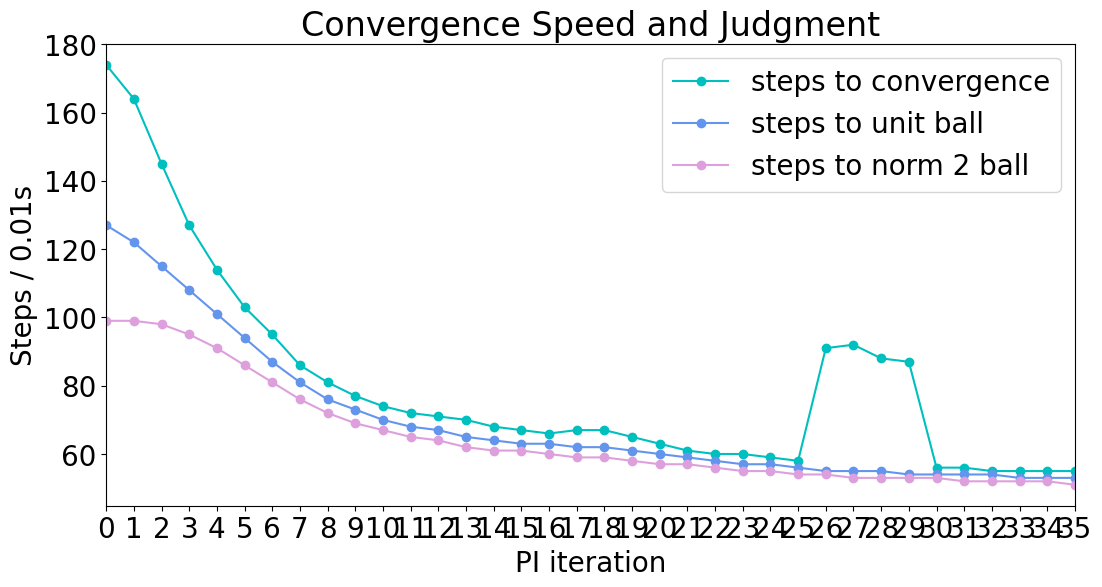

[174, 164, 145, 127, 114, 103, 95, 86, 81, 77, 74, 72, 71, 70, 68, 67, 66, 67, 67, 65, 63, 61, 60, 60, 59, 58, 91, 92, 88, 87, 56, 56, 55, 55, 55, 55]
[127, 122, 115, 108, 101, 94, 87, 81, 76, 73, 70, 68, 67, 65, 64, 63, 63, 62, 62, 61, 60, 59, 58, 57, 57, 56, 55, 55, 55, 54, 54, 54, 54, 53, 53, 53]
[99, 99, 98, 95, 91, 86, 81, 76, 72, 69, 67, 65, 64, 62, 61, 61, 60, 59, 59, 58, 57, 57, 56, 55, 55, 54, 54, 53, 53, 53, 53, 52, 52, 52, 52, 51]
---------------------------------Iteration 36-------------------------------
---------------------Sampling Training Data---------------------
--------------------------Learning V----------------------------
Epoch [1000/1000], Loss: 1.2549532652
L0:tensor([0.2041], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:1.845331644290127e-05, 
torch.sum(F.relu(dL)):0.0
--------------------------Soft Update---------------------------
--------------------------Learning D----------------------------
Epoch [1000/1000], Loss: 13.5865659714
torch.sum(loss_fn(dL,

[174, 164, 145, 127, 114, 103, 95, 86, 81, 77, 74, 72, 71, 70, 68, 67, 66, 67, 67, 65, 63, 61, 60, 60, 59, 58, 91, 92, 88, 87, 56, 56, 55, 55, 55, 55, 54]
[127, 122, 115, 108, 101, 94, 87, 81, 76, 73, 70, 68, 67, 65, 64, 63, 63, 62, 62, 61, 60, 59, 58, 57, 57, 56, 55, 55, 55, 54, 54, 54, 54, 53, 53, 53, 52]
[99, 99, 98, 95, 91, 86, 81, 76, 72, 69, 67, 65, 64, 62, 61, 61, 60, 59, 59, 58, 57, 57, 56, 55, 55, 54, 54, 53, 53, 53, 53, 52, 52, 52, 52, 51, 51]
---------------------------------Iteration 37-------------------------------
---------------------Sampling Training Data---------------------
--------------------------Learning V----------------------------
Epoch [1000/1000], Loss: 1.2238459587
L0:tensor([0.0037], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.0, 
torch.sum(F.relu(dL)):0.0
--------------------------Soft Update---------------------------
--------------------------Learning D----------------------------
Epoch [1000/1000], Loss: 63.8371849060
torch.sum(loss_fn(dL, DV_ex

[174, 164, 145, 127, 114, 103, 95, 86, 81, 77, 74, 72, 71, 70, 68, 67, 66, 67, 67, 65, 63, 61, 60, 60, 59, 58, 91, 92, 88, 87, 56, 56, 55, 55, 55, 55, 54, 85]
[127, 122, 115, 108, 101, 94, 87, 81, 76, 73, 70, 68, 67, 65, 64, 63, 63, 62, 62, 61, 60, 59, 58, 57, 57, 56, 55, 55, 55, 54, 54, 54, 54, 53, 53, 53, 52, 52]
[99, 99, 98, 95, 91, 86, 81, 76, 72, 69, 67, 65, 64, 62, 61, 61, 60, 59, 59, 58, 57, 57, 56, 55, 55, 54, 54, 53, 53, 53, 53, 52, 52, 52, 52, 51, 51, 51]
---------------------------------Iteration 38-------------------------------
---------------------Sampling Training Data---------------------
--------------------------Learning V----------------------------
Epoch [1000/1000], Loss: 1.3994040489
L0:tensor([0.3068], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.0016922142822295427, 
torch.sum(F.relu(dL)):0.8635401725769043
--------------------------Soft Update---------------------------
--------------------------Learning D----------------------------
Epoch [1000/1000], Lo

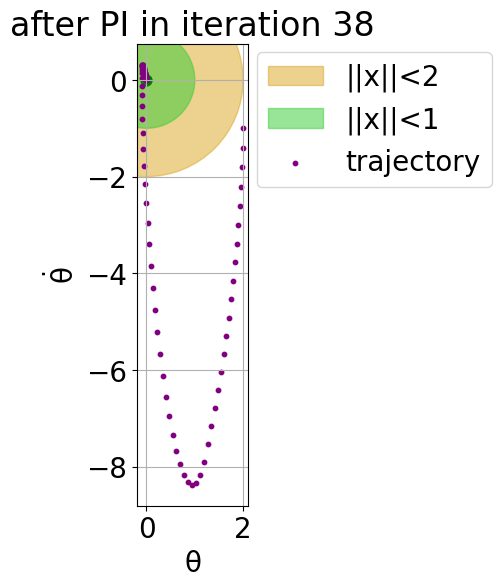

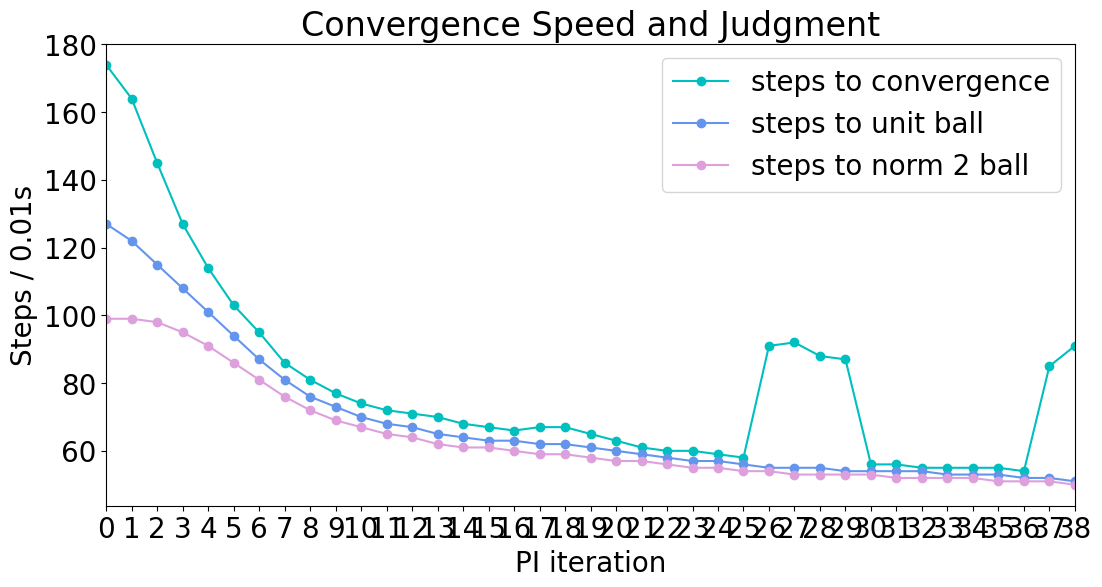

[174, 164, 145, 127, 114, 103, 95, 86, 81, 77, 74, 72, 71, 70, 68, 67, 66, 67, 67, 65, 63, 61, 60, 60, 59, 58, 91, 92, 88, 87, 56, 56, 55, 55, 55, 55, 54, 85, 91]
[127, 122, 115, 108, 101, 94, 87, 81, 76, 73, 70, 68, 67, 65, 64, 63, 63, 62, 62, 61, 60, 59, 58, 57, 57, 56, 55, 55, 55, 54, 54, 54, 54, 53, 53, 53, 52, 52, 51]
[99, 99, 98, 95, 91, 86, 81, 76, 72, 69, 67, 65, 64, 62, 61, 61, 60, 59, 59, 58, 57, 57, 56, 55, 55, 54, 54, 53, 53, 53, 53, 52, 52, 52, 52, 51, 51, 51, 50]
---------------------------------Iteration 39-------------------------------
---------------------Sampling Training Data---------------------
--------------------------Learning V----------------------------
Epoch [1000/1000], Loss: 1.2663890123
L0:tensor([0.0117], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.0, 
torch.sum(F.relu(dL)):0.0
--------------------------Soft Update---------------------------
--------------------------Learning D----------------------------
Epoch [1000/1000], Loss: 71.5848541260
tor

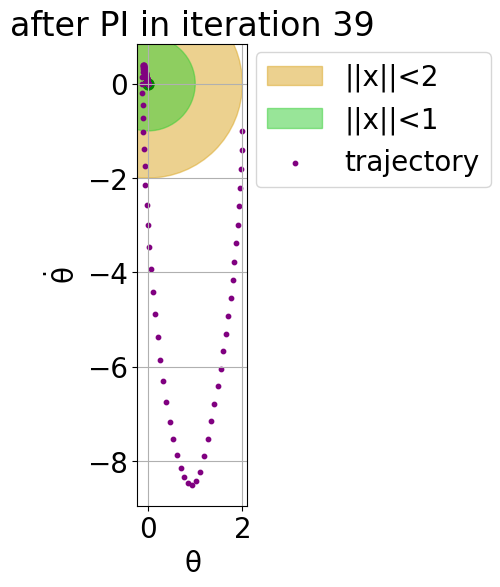

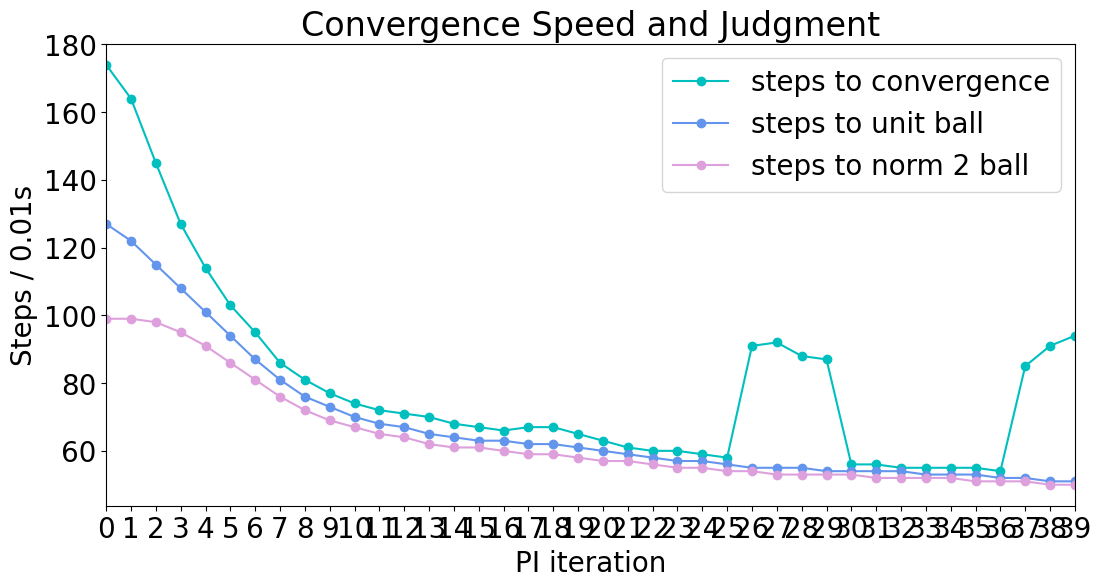

[174, 164, 145, 127, 114, 103, 95, 86, 81, 77, 74, 72, 71, 70, 68, 67, 66, 67, 67, 65, 63, 61, 60, 60, 59, 58, 91, 92, 88, 87, 56, 56, 55, 55, 55, 55, 54, 85, 91, 94]
[127, 122, 115, 108, 101, 94, 87, 81, 76, 73, 70, 68, 67, 65, 64, 63, 63, 62, 62, 61, 60, 59, 58, 57, 57, 56, 55, 55, 55, 54, 54, 54, 54, 53, 53, 53, 52, 52, 51, 51]
[99, 99, 98, 95, 91, 86, 81, 76, 72, 69, 67, 65, 64, 62, 61, 61, 60, 59, 59, 58, 57, 57, 56, 55, 55, 54, 54, 53, 53, 53, 53, 52, 52, 52, 52, 51, 51, 51, 50, 50]
---------------------------------Iteration 40-------------------------------
---------------------Sampling Training Data---------------------
--------------------------Learning V----------------------------
Epoch [1000/1000], Loss: 1.4434819221
L0:tensor([0.2584], device='cuda:0', grad_fn=<SelectBackward0>), 
PD:0.00024069976643659174, 
torch.sum(F.relu(dL)):2.8046011924743652
--------------------------Soft Update---------------------------
--------------------------Learning D-------------------------

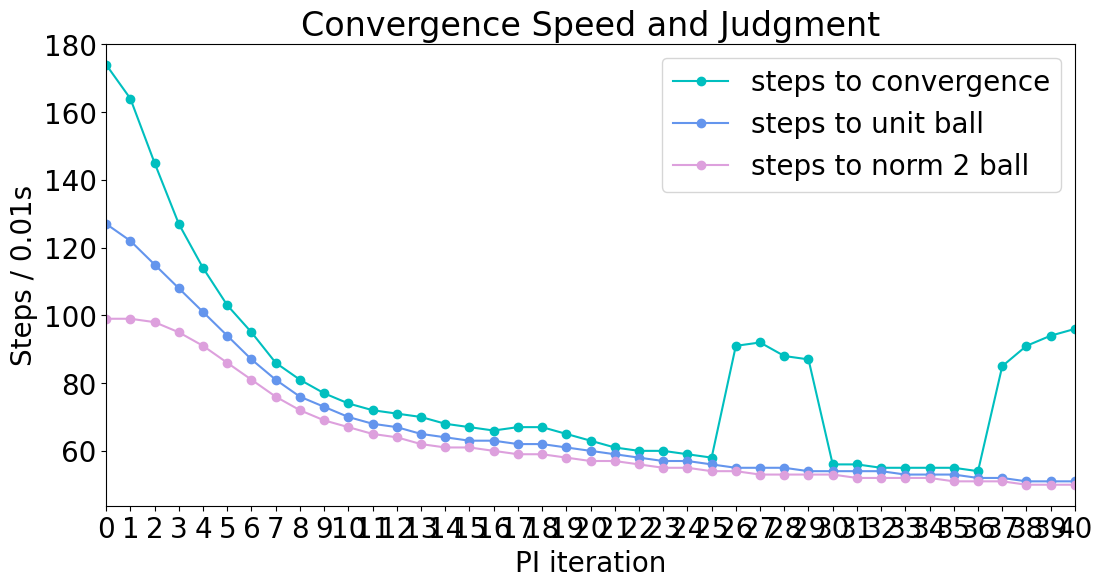

[174, 164, 145, 127, 114, 103, 95, 86, 81, 77, 74, 72, 71, 70, 68, 67, 66, 67, 67, 65, 63, 61, 60, 60, 59, 58, 91, 92, 88, 87, 56, 56, 55, 55, 55, 55, 54, 85, 91, 94, 96]
[127, 122, 115, 108, 101, 94, 87, 81, 76, 73, 70, 68, 67, 65, 64, 63, 63, 62, 62, 61, 60, 59, 58, 57, 57, 56, 55, 55, 55, 54, 54, 54, 54, 53, 53, 53, 52, 52, 51, 51, 51]
[99, 99, 98, 95, 91, 86, 81, 76, 72, 69, 67, 65, 64, 62, 61, 61, 60, 59, 59, 58, 57, 57, 56, 55, 55, 54, 54, 53, 53, 53, 53, 52, 52, 52, 52, 51, 51, 51, 50, 50, 50]


In [2]:
# initialize dynamics
params={'m': 1,'L': 1.0, 'b': 0.5}
# controller_params = {'K':np.array([[14,  3]])}
controller_params = {'K':np.array([[15,  4]])}
p1 = InvertedPendulum(system_params = params,
                      controller_params = controller_params,
                      dt = 0.01, 
                      controller_period = 0.01)

# using LQR
# p1.linearize_and_compute_LQR()

# Preview of ROLLOUT
x_initial = torch.tensor([[2],[-1]]).to(device)
step_num = 500
sim_data_ = p1.simulate_rk4(x_initial, step_num, 1,)
p1.convergence_judgment(sim_data_)
p1.plot_phase_portrait(data_sim = sim_data_,
                       arrow_on = False,
                       title = 'System Phase Portrait with initial controller')

d1 = OffPolicyDlearningProcess(system=p1,
                                n_hiddens_policy=32,
                                n_hiddens_lyapunov=64,
                                n_hiddens_dfunction=64,
                                gamma = 0.9,
                                tau = 0.3,
                                replay_buffer_capacity = 4000,
                                min_training_batch = 2000,
                                save_path = 'experiment_results/DOPT/')

# Start training
d1.off_policy_dlearning_main_iteration(iteration = 40,
                                        plot_x_initial = x_initial,
                                        plot_step_num = 500)